In [2]:
import pandas as pd
import glob
import numpy as np
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [5]:
pwd

'c:\\Users\\nimod\\OneDrive - Université de Technologie de Troyes\\Fil_rouge\\Github'

In [6]:
glob.glob('./Tables_traitees/*')

['./Tables_traitees\\Aeroports_avec_code_commune.csv',
 './Tables_traitees\\Communes_manquantes.csv',
 './Tables_traitees\\df_aero_nb_par_commune.csv',
 './Tables_traitees\\df_carb_nb_par_commune.csv',
 './Tables_traitees\\df_elec_nb_par_commune.csv',
 './Tables_traitees\\DF_FINAL_FOR_MODELISATION.csv',
 './Tables_traitees\\df_gare_nb_par_commune.csv',
 './Tables_traitees\\Gare_ferroviaire_avec_code_commune.csv',
 './Tables_traitees\\Infos_communes.csv',
 './Tables_traitees\\Infos_communes_avec_prix_estimé.csv',
 './Tables_traitees\\Merge_des_tables_sans_estimation_sans_df_elec&df_carb.csv',
 './Tables_traitees\\Population-Superficie_communes.csv',
 './Tables_traitees\\PrixMoy_m2_avec_code_commune.csv',
 './Tables_traitees\\Stations_carburant_avec_code_commune.csv',
 './Tables_traitees\\Stations_electriques_avec_code_commune.csv',
 './Tables_traitees\\Table_avec_prixM2_estime.csv',
 './Tables_traitees\\Table_avec_prixM2_estime_FranceMétropolitaine.csv',
 './Tables_traitees\\Table_avec_

| N° | Dataframe | Description |
| -- | -- | -- |  
| 1. | df_elec | Bornes électriques |
| 2. | df_carb | Stations Carburant | 
| 3. | df_pop | Population et superficie commune | 
| 4. | df_com | Infos communes | 
| 5. | df_commune_immo | Prix au m2 | 
| 6. | df_commune_adj | Communes adjacentes | |
|    | df | Dataframe regroupant pop, com, commune_immo et commune adj |
|    | df_train | =df moins 6000 valeurs, à utiliser pour l'entrainement des modèles, le reste sera pour comparer les estimations |
|    | df_m2 | =df_train filtré par les valeurs qui ont un prix au m2 |
|    | df_ridge | =df_train filtré par les valeurs qui ont un prix au m2 mais aussi filtré par les valeurs non NA de features |

In [7]:
# # Lecture du fichier des tables mergées
# df = pd.read_csv('./Tables_traitees/Merge_des_tables_sans_estimation_sans_df_elec&df_carb.csv',
#                  sep=';',dtype={'3_Code département':str, '3_Code INSEE (commune ou arrondissement)':str, 
#                                 '3_Code EPCI':str, '1_Code INSEE commune':str, '1_Num PDL':str,
#                                 '1_longitude':str, '1_code_commune_n':str, '2_Code INSEE':str,
#                                 '2_code_commune_n':str, '4_Code Postal':str, "5_INSEE_DEP":str, "5_ID":str,
#                                 "5_INSEE_COM":str,"5_code_commune_n":str,"6_insee":str,"4_Code INSEE":str,
#                                 "4_Code Département":str })

In [8]:
# # Lecture du fichier des tables mergées avec les estimations m2 déjà enregistrées
# df = pd.read_csv('./Tables_traitees/Table_avec_prixM2_estime.csv',
#                  sep=';',dtype={'3_Code département':str, '3_Code INSEE (commune ou arrondissement)':str, 
#                                 '3_Code EPCI':str, '1_Code INSEE commune':str, '1_Num PDL':str,
#                                 '1_longitude':str, '1_code_commune_n':str, '2_Code INSEE':str,
#                                 '2_code_commune_n':str, '4_Code Postal':str, "5_INSEE_DEP":str, "5_ID":str,
#                                 "5_INSEE_COM":str,"5_code_commune_n":str,"6_insee":str,"4_Code INSEE":str,
#                                 "4_Code Département": 'category' })

In [9]:
# Lecture du fichier des tables mergées avec les estimations m2 déjà enregistrées pour France Métropolitaine
df = pd.read_csv('./Tables_traitees/Table_avec_prixM2_estime_FranceMétropolitaine.csv',
                 sep=';',dtype={'3_Code département':'category', '3_Code INSEE (commune ou arrondissement)':str, 
                                '3_Code EPCI':str, '1_Code INSEE commune':str, '1_Num PDL':str,
                                '1_longitude':str, '1_code_commune_n':str, '2_Code INSEE':str,
                                '2_code_commune_n':str, '4_Code Postal':str, "5_INSEE_DEP":str, "5_ID":str,
                                "5_INSEE_COM":str,"5_code_commune_n":str,"6_insee":str,"4_Code INSEE":str,
                                "4_Code Département": 'category' ,'4_Statut':'category','4_Code Région':'category',
                               '3_Code Région':'category'})

In [10]:
df.shape

(36258, 69)

In [11]:
# Conversion du numero de commune au format à 5 chiffres, car il y a des communes qui ne respectent pas ce format
def format_insee(code):
    code = str(code)
    if len(code)==4:
        new_code = '0'+ code
        print(code, new_code)
    elif '.' in code:
        new_code = str(int(float(code)))
        if len(new_code)==4:
            new_code = '0'+ new_code
        print(code, new_code)
    else:
        new_code = code
    return new_code
df['3_Code INSEE (commune ou arrondissement)'] = df['3_Code INSEE (commune ou arrondissement)'].apply(format_insee)
# df['3_Code INSEE (commune ou arrondissement)'] = df['3_Code INSEE (commune ou arrondissement)'].astype(int)

1620.0 01620
1444.0 01444


In [12]:
df['3_Code INSEE (commune ou arrondissement)'].unique()

array(['01001', '01002', '01004', ..., '95682', '95690', '01620'],
      dtype=object)

In [13]:
sorted(df.columns.to_list())

['3_Année recensement',
 '3_Année utilisation',
 '3_Code EPCI',
 '3_Code INSEE (commune ou arrondissement)',
 '3_Code commune',
 '3_Code département',
 '3_Code région',
 '3_Densité_hab_par_km2',
 '3_EPCI',
 '3_Nom de la commune',
 '3_Nom de la région',
 '3_Population comptée à part',
 '3_Population municipale',
 '3_Population totale',
 '3_Statut',
 '3_Superficie de la commune',
 '4_Altitude Moyenne',
 '4_Code Arrondissement',
 '4_Code Canton',
 '4_Code Commune',
 '4_Code Département',
 '4_Code INSEE',
 '4_Code Postal',
 '4_Code Région',
 '4_Commune',
 '4_Densité_hab_par_km2',
 '4_Département',
 '4_ID Geofla',
 '4_Population',
 '4_Région',
 '4_Statut',
 '4_Superficie',
 '4_geo_point_2d',
 '4_geo_shape',
 '4_lat',
 '4_lon',
 '5_CODE_EPCI',
 '5_ID',
 '5_INSEE_COM',
 '5_INSEE_DEP',
 '5_INSEE_REG',
 '5_NOM_COM_M',
 '5_Nb_Ventes',
 '5_POPULATION',
 '5_PrixMoyen_M2',
 '5_code_commune_n',
 '5_nb_digits_code_INSEE',
 '6_cap_voisins',
 '6_insee',
 '6_insee_voisins',
 '6_nb_voisins',
 '6_nom',
 '

In [14]:
# Valeurs uniques et manquant par colonne
df_analyse = []
manquantes = df.isna().sum()
for t in df.columns:
    row = {}
    row['Variable']=t
    row['type']= df[t].dtypes
    row['Nb_val_unique']=len(df[t].unique())
    row['Nb_manquant']=manquantes[t]
    df_analyse.append(row)
df_analyse = pd.DataFrame(df_analyse)
df_analyse.sort_values(by='Nb_manquant',ascending=False)

,Variable,type,Nb_val_unique,Nb_manquant
53,6_type,object,11,35496
24,5_PrixMoyen_M2,float64,3683,9512
23,5_Nb_Ventes,float64,555,9512
57,B_Prix_estimé_vois_median,float64,9547,1859
55,A_Prix_estimé_vois_mean,float64,29365,1859
52,6_cap_voisins,object,34450,1805
51,6_noms_voisins,object,34451,1805
50,6_insee_voisins,object,34451,1805
49,6_nb_voisins,float64,25,1805
48,6_nom,object,32225,1805


In [15]:
df['3_Nom de la région'].unique()

array(['Auvergne-Rhône-Alpes', 'Rhône-Alpes', 'Hauts-de-France',
       'Picardie', 'Auvergne', "Provence-Alpes-Côte d'Azur", 'Grand Est',
       'Champagne-Ardenne', 'Grand-Est', 'Occitanie',
       'Languedoc-Roussillon', 'Midi-Pyrénées', 'Normandie',
       'Basse-Normandie', 'Nouvelle-Aquitaine', 'Poitou-Charentes',
       'Centre-Val de Loire', 'Limousin', 'Bourgogne-Franche-Comté',
       'Bourgogne', 'Bretagne', 'Aquitaine', 'Franche-Comté',
       'Haute-Normandie', 'Centre', 'Pays de la Loire', 'Lorraine',
       'Nord-Pas-de-Calais', 'Alsace', 'Île-de-France', '1620.0',
       '1444.0'], dtype=object)

In [16]:
# correction d'une ligne (la seule, dont la superficie et la densité n'étaient pas remplies
# df.loc[31441, '3_Superficie de la commune'] = 8.71
# df.loc[31441, '3_Densité_hab_par_km2'] = 254.0/8.71
# df.loc[31441,:]

- Choisissons d'abord une liste d'index de 6000 valeurs
- Nous n'utiliserons pas ces lignes pour les entrainements de modèles de ML, uniquement pour mesurer la précision de chaque modèle
- SVP pour entrainer vos modèles, utiliser désormais df_train
- Ensuite vous faites la prédictions sur tout le dataframe df
- Pour la comparaison on utilisera que les lignes correspondantes aux index_to_remove, ainsi on peut comparer les résultats sur des données non entrainées

In [17]:
France_metropolitaine = ['Auvergne-Rhône-Alpes', 'Rhône-Alpes', 'Hauts-de-France',
       'Picardie', 'Auvergne', "Provence-Alpes-Côte d'Azur", 'Grand Est',
       'Champagne-Ardenne', 'Grand-Est', 'Occitanie',
       'Languedoc-Roussillon', 'Midi-Pyrénées', 'Normandie',
       'Basse-Normandie', 'Nouvelle-Aquitaine', 'Poitou-Charentes',
       'Centre-Val de Loire', 'Limousin', 'Bourgogne-Franche-Comté',
       'Bourgogne', 'Bretagne', 'Aquitaine', 'Franche-Comté',
       'Haute-Normandie', 'Centre', 'Pays de la Loire',
       'Lorraine', 'Nord-Pas-de-Calais', 'Alsace', 'Île-de-France']

In [18]:
df = df[df['3_Nom de la région'].isin(France_metropolitaine)]
df_clean = df.drop(['6_type', 'B_Prix_estimé_vois_median', 'A_Prix_estimé_vois_mean',
                   ], axis = 1)

In [19]:
df.shape

(36256, 69)

In [20]:
df_no_na = df_clean[(df_clean['5_PrixMoyen_M2'].isna()==False) & (df_clean['6_nom'].isna()==False) & (df_clean['4_Commune'].isna()==False)]
df_no_na = df_no_na.reset_index(drop=True)
df_no_na.shape

(26678, 66)

In [21]:
np.random.seed(97)
index_to_remove = np.random.randint(0,len(df_no_na)+1, size=6000)
df_train = df_no_na.drop(index_to_remove)

In [22]:
df_m2 = df_train

In [23]:
# Valeurs uniques par colonne
df_analyse = []
manquantes = df_m2.isna().sum()
for t in df_m2.columns:
    row = {}
    row['Variable']=t
    row['type']= df_m2[t].dtypes
    row['Nb_val_unique']=len(df_m2[t].unique())
    row['Nb_manquant']=manquantes[t]
    df_analyse.append(row)
df_analyse = pd.DataFrame(df_analyse)
df_analyse.sort_values(by='Nb_manquant',ascending=False)

,Variable,type,Nb_val_unique,Nb_manquant
0,3_Code région,float64,12,0
49,6_nb_voisins,float64,21,0
35,4_Population,float64,425,0
36,4_geo_point_2d,object,21315,0
37,4_geo_shape,object,21315,0
38,4_ID Geofla,float64,21315,0
39,4_Code Commune,float64,881,0
40,4_Code Canton,float64,94,0
41,4_Code Arrondissement,float64,7,0
42,4_Code Département,category,90,0


In [24]:
from sklearn.model_selection import KFold
nb_kfold = 5
rdm_state = 97
kf = KFold(n_splits=nb_kfold,shuffle=True, random_state = rdm_state)

# Valeur de lat et Lon manquantes sur df

In [25]:
df.isna().sum()

3_Code région                                   0
3_Nom de la région                              0
3_Code département                              0
3_Code commune                                  0
3_Nom de la commune                             0
3_Population municipale                         0
3_Population comptée à part                     0
3_Population totale                             0
3_Année recensement                             0
3_Année utilisation                             0
3_Code INSEE (commune ou arrondissement)        0
3_Superficie de la commune                    818
3_Statut                                        0
3_Code EPCI                                    21
3_EPCI                                         21
3_Densité_hab_par_km2                         818
5_ID                                         1733
5_INSEE_COM                                  1733
5_INSEE_DEP                                  1733
5_INSEE_REG                                  1733


In [26]:
df.loc[(df['4_lon'].isna()) | (df['4_lon'].isna()), ['3_Code INSEE (commune ou arrondissement)', '4_Code Postal', '4_Commune', '4_lat', '4_lon', '3_Nom de la commune']]

,3_Code INSEE (commune ou arrondissement),4_Code Postal,4_Commune,4_lat,4_lon,3_Nom de la commune


In [27]:
# # On va utiliser google pour vérifier les codes insee et obtenir les lat lon
# for i, c in df.loc[(df['4_lon'].isna()) | (df['4_lon'].isna()),:].iterrows():
#     print(i, f"Code insee et latitude et longitude de la commune de {c['3_Nom de la commune']}")

In [28]:
# # Code01/01/2017 : L'Oudon devient commune déléguée au sein de Saint-Pierre-en-Auge (14654), on la supprime
# # 01/01/2009 : Saint-Germain-Source-Seine est rattachée à Blessey (21084) qui devient Source-Seine (fusion simple).
# # 01/01/2012 : Bleury est rattachée à Saint-Symphorien-le-Château (28361) qui devient Bleury-Saint-Symphorien (commune nouvelle).
# # 09/12/2010 : Fort-Mardyck est rattachée à Dunkerque (59183) (fusion association).
# # 09/12/2010 : Saint-Pol-sur-Mer est rattachée à Dunkerque (59183) (fusion association).
# df.drop(index=[4972,7500,10532,22952,23235], inplace=True)

In [29]:
# df.loc[21025,'4_lat'] , df.loc[21025,'4_lon'] = 48.754839523806524, 5.266094317253626
# df.loc[30582 ,'4_lat'] , df.loc[30582 ,'4_lon'] = 49.456599715653944, 1.120591347182561
# df.loc[31081  ,'4_lat'] , df.loc[31081  ,'4_lon'] = 49.50913467857128, 1.4475693013260966

In [30]:
# Il n'y a maintenant plus de manquant dans lat et lon
df.loc[(df['4_lon'].isna()) | (df['4_lon'].isna()), ['3_Code INSEE (commune ou arrondissement)', '4_Code Postal', '4_Commune', '4_lat', '4_lon', '3_Nom de la commune']]

,3_Code INSEE (commune ou arrondissement),4_Code Postal,4_Commune,4_lat,4_lon,3_Nom de la commune


In [31]:
df.shape

(36256, 69)

# Estimation des manquants prix moyen m2 

On commence par choisir les variables qui vont participer à l'imputation

In [32]:
sel_col = ['3_Code INSEE (commune ou arrondissement)','3_Code département', '5_PrixMoyen_M2', 
           'A_Prix_estimé_vois_mean', 'A_Prix_consolidé_vois_mean', 'B_Prix_estimé_vois_median', 'B_Prix_consolidé_vois_median', 
           '6_insee_voisins']

## A-Par moyenne et B-médiane des communes avoisinantes

In [33]:
# On initialise les nouvelles variables
df_m2['A_Prix_consolidé_vois_mean'] = np.nan
df_m2['A_Prix_estimé_vois_mean'] = np.nan
df_m2['B_Prix_consolidé_vois_median'] = np.nan
df_m2['B_Prix_estimé_vois_median'] = np.nan
df_m2['5_PrixMoyen_M2'] = df_m2['5_PrixMoyen_M2'].astype(float)
# On initialise les nouvelles variables
df['A_Prix_consolidé_vois_mean'] = np.nan
df['A_Prix_estimé_vois_mean'] = np.nan
df['B_Prix_consolidé_vois_median'] = np.nan
df['B_Prix_estimé_vois_median'] = np.nan
df['5_PrixMoyen_M2'] = df['5_PrixMoyen_M2'].astype(float)

In [34]:
# On crée un dictionnaire pour aller plus vite dans la recherche des communes voisines 
voisins_dict = df.set_index('6_insee')['6_insee_voisins'].to_dict()
df_m2['A_Prix_consolidé_vois_mean'] = df_m2['5_PrixMoyen_M2']
df_m2['B_Prix_consolidé_vois_median'] = df_m2['5_PrixMoyen_M2']
df['A_Prix_consolidé_vois_mean'] = df['5_PrixMoyen_M2']
df['B_Prix_consolidé_vois_median'] = df['5_PrixMoyen_M2']

In [35]:
def estim_prix(code, vois, prix_mean, prix_median):
    try:
        # voisins = df_commune_adj.loc[df_commune_adj['insee']==code,'insee_voisins'].values[0].split('|')
        voisins = vois[str(code)].split('|')
        # print(voisins)
        prix_voisins_mean = list()
        prix_voisins_median = list()
        for v in voisins:
            try:
                # p = df.loc[df['Code INSEE (commune ou arrondissement)']==v,'Prix_consolidé'].values[0]
                p1 = prix_mean[str(v)]
                p2 = prix_median[str(v)]
            except:
                p1, p2 = None, None
            # nb = df.loc[df['Code INSEE (commune ou arrondissement)']==v,'Nb_Ventes'].values[0]
            prix_voisins_mean.append(float(p1))
            prix_voisins_median.append(float(p2))
        # print(code, voisins,prix_voisins)
        mean = np.nanmean(prix_voisins_mean)
        median = np.nanmedian(prix_voisins_median)
    except:
        mean = np.nan
        median = np.nan
    # print(code, mean, median)
    # print('-------')
    return pd.Series({'A_Prix_estimé_vois_mean': mean, 'B_Prix_estimé_vois_median': median})

In [36]:
%%time
n_iterations = 25
i=0
print('iteration:',i,'nbre de manquants:', sum(pd.isna(df['A_Prix_consolidé_vois_mean'])))
while i<n_iterations:
    Prix_consolidé_dict_mean = df.set_index('3_Code INSEE (commune ou arrondissement)')['A_Prix_consolidé_vois_mean'].to_dict()
    Prix_consolidé_dict_median = df.set_index('3_Code INSEE (commune ou arrondissement)')['B_Prix_consolidé_vois_median'].to_dict()
    df[['A_Prix_estimé_vois_mean', 'B_Prix_estimé_vois_median']] = df.apply(lambda x: estim_prix(x['3_Code INSEE (commune ou arrondissement)'], 
                                                                                      voisins_dict, Prix_consolidé_dict_mean, 
                                                                                      Prix_consolidé_dict_median ),axis=1)
    
    df.loc[:,'A_Prix_consolidé_vois_mean'] = df.loc[:,'A_Prix_estimé_vois_mean']
    df.loc[:,'B_Prix_consolidé_vois_median'] = df.loc[:,'B_Prix_estimé_vois_median']
    df.loc[pd.notna(df['5_PrixMoyen_M2']),'A_Prix_consolidé_vois_mean'] = df.loc[pd.notna(df['5_PrixMoyen_M2']), '5_PrixMoyen_M2'] 
    df.loc[pd.notna(df['5_PrixMoyen_M2']),'B_Prix_consolidé_vois_median'] = df.loc[pd.notna(df['5_PrixMoyen_M2']), '5_PrixMoyen_M2'] 
    nb_manquants = sum(pd.isna(df['A_Prix_consolidé_vois_mean']))
    i+=1
    print('iteration:',i,'nbre de manquants:',nb_manquants)

iteration: 0 nbre de manquants: 9512


C:\Users\nimod\AppData\Local\Temp\ipykernel_19540\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
c:\Users\nimod\.conda\envs\mobilite\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 1 nbre de manquants: 3730


C:\Users\nimod\AppData\Local\Temp\ipykernel_19540\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
c:\Users\nimod\.conda\envs\mobilite\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 2 nbre de manquants: 3195


C:\Users\nimod\AppData\Local\Temp\ipykernel_19540\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
c:\Users\nimod\.conda\envs\mobilite\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 3 nbre de manquants: 2981


C:\Users\nimod\AppData\Local\Temp\ipykernel_19540\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
c:\Users\nimod\.conda\envs\mobilite\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 4 nbre de manquants: 2828


C:\Users\nimod\AppData\Local\Temp\ipykernel_19540\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
c:\Users\nimod\.conda\envs\mobilite\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 5 nbre de manquants: 2686


C:\Users\nimod\AppData\Local\Temp\ipykernel_19540\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
c:\Users\nimod\.conda\envs\mobilite\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 6 nbre de manquants: 2553


C:\Users\nimod\AppData\Local\Temp\ipykernel_19540\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
c:\Users\nimod\.conda\envs\mobilite\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 7 nbre de manquants: 2415


C:\Users\nimod\AppData\Local\Temp\ipykernel_19540\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
c:\Users\nimod\.conda\envs\mobilite\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 8 nbre de manquants: 2288


C:\Users\nimod\AppData\Local\Temp\ipykernel_19540\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
c:\Users\nimod\.conda\envs\mobilite\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 9 nbre de manquants: 2183


C:\Users\nimod\AppData\Local\Temp\ipykernel_19540\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
c:\Users\nimod\.conda\envs\mobilite\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 10 nbre de manquants: 2100


C:\Users\nimod\AppData\Local\Temp\ipykernel_19540\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
c:\Users\nimod\.conda\envs\mobilite\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 11 nbre de manquants: 2028


C:\Users\nimod\AppData\Local\Temp\ipykernel_19540\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
c:\Users\nimod\.conda\envs\mobilite\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 12 nbre de manquants: 1956


C:\Users\nimod\AppData\Local\Temp\ipykernel_19540\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
c:\Users\nimod\.conda\envs\mobilite\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 13 nbre de manquants: 1897


C:\Users\nimod\AppData\Local\Temp\ipykernel_19540\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
c:\Users\nimod\.conda\envs\mobilite\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 14 nbre de manquants: 1842


C:\Users\nimod\AppData\Local\Temp\ipykernel_19540\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
c:\Users\nimod\.conda\envs\mobilite\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 15 nbre de manquants: 1798


C:\Users\nimod\AppData\Local\Temp\ipykernel_19540\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
c:\Users\nimod\.conda\envs\mobilite\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 16 nbre de manquants: 1770


C:\Users\nimod\AppData\Local\Temp\ipykernel_19540\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
c:\Users\nimod\.conda\envs\mobilite\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 17 nbre de manquants: 1756


C:\Users\nimod\AppData\Local\Temp\ipykernel_19540\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
c:\Users\nimod\.conda\envs\mobilite\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 18 nbre de manquants: 1748


C:\Users\nimod\AppData\Local\Temp\ipykernel_19540\2398426113.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(prix_voisins_mean)
c:\Users\nimod\.conda\envs\mobilite\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


iteration: 19 nbre de manquants: 1744
iteration: 20 nbre de manquants: 1742
iteration: 21 nbre de manquants: 1742
iteration: 22 nbre de manquants: 1742
iteration: 23 nbre de manquants: 1742
iteration: 24 nbre de manquants: 1742
iteration: 25 nbre de manquants: 1742
CPU times: total: 1min 52s
Wall time: 3min 51s


In [37]:
df.loc[:10,['A_Prix_estimé_vois_mean', 'B_Prix_estimé_vois_median']]

,A_Prix_estimé_vois_mean,B_Prix_estimé_vois_median
0,2167.500000,2080.5
1,1503.879310,1458.5
2,1725.714286,1678.0
3,2647.857143,2701.0
4,1460.333333,1287.0
5,1739.555556,1731.0
6,1789.200000,1693.0
7,1388.400000,1286.0
8,1812.571429,1723.0
9,1569.142857,1552.0


In [38]:
sum(pd.isna(df_m2['A_Prix_estimé_vois_mean']))

21315

In [39]:
df_m2.shape

(21315, 68)

In [40]:
df_vois_no_na = df[(df['5_PrixMoyen_M2'].isna()==False) & (df['6_nom'].isna()==False) & (df['4_Commune'].isna()==False)]
df_vois_no_na = df_vois_no_na.reset_index(drop=True)

2 cas pour ceux qui n'ont pas de prix consolidé
- soit ils n'ont pas de voisins identifiés
- soit ils ont des voisins mais n'ont pas de prix, en DOM TOM, départements 97X

In [41]:
print(len(df_vois_no_na[df_vois_no_na['5_PrixMoyen_M2'].isna()]))
print(len(df_vois_no_na[df_vois_no_na['A_Prix_consolidé_vois_mean'].isna()]))
print(len(df_vois_no_na[df_vois_no_na['B_Prix_consolidé_vois_median'].isna()]))

0
0
0


In [42]:
df_vois_no_na[df_vois_no_na['A_Prix_estimé_vois_mean'].isna() & df_vois_no_na['A_Prix_consolidé_vois_mean'].notna()].head()

,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,3_Année utilisation,...,C1_Prix_estime_median,F_Prix_estimé_RFReg,G_Prix_estimé_LassoCV,E_Prix_estime_KNN,E_Prix_consolidé_KNN,F_Prix_consolidé_RFReg,E_NbVentes_estime_KNN,E_NbVentes_consolidé_KNN,F_NbVentes_estimé_RFReg,F_NbVentes_consolidé_RFReg
3236,93.0,Provence-Alpes-Côte d'Azur,13,2.0,Allauch,21228.0,256.0,21484.0,2016.0,2019.0,...,1448.0,3760.414650,2077.454752,3687.500000,3731.0,3731.0,83.193548,259.0,86.396582,259.0
3239,93.0,Provence-Alpes-Côte d'Azur,13,5.0,Aubagne,45290.0,421.0,45711.0,2016.0,2019.0,...,1448.0,3418.626956,2355.157790,3628.666667,3046.0,3046.0,82.677419,514.0,92.067440,514.0
3256,93.0,Provence-Alpes-Côte d'Azur,13,22.0,Cassis,7162.0,103.0,7265.0,2016.0,2019.0,...,1448.0,5430.838033,1981.045136,3745.583333,6303.0,6303.0,76.096774,126.0,85.800947,126.0
3302,93.0,Provence-Alpes-Côte d'Azur,13,70.0,La Penne-sur-Huveaune,6433.0,60.0,6493.0,2016.0,2019.0,...,1448.0,4247.635145,2507.884011,3633.833333,3486.0,3486.0,87.516129,62.0,85.800947,62.0
3303,93.0,Provence-Alpes-Côte d'Azur,13,71.0,Les Pennes-Mirabeau,21361.0,276.0,21637.0,2016.0,2019.0,...,1448.0,3384.514559,2157.660236,3408.333333,3457.0,3457.0,91.129032,89.0,72.829901,89.0


In [43]:
df_no_na['A_Prix_estimé_vois_mean'] = df_vois_no_na['A_Prix_estimé_vois_mean']
df_no_na['B_Prix_estimé_vois_median'] = df_vois_no_na['B_Prix_estimé_vois_median']

In [44]:
df_no_na[['5_PrixMoyen_M2', 'A_Prix_estimé_vois_mean', 'B_Prix_estimé_vois_median']].head()

,5_PrixMoyen_M2,A_Prix_estimé_vois_mean,B_Prix_estimé_vois_median
0,1938.0,2167.500000,2080.5
1,1130.0,1503.879310,1458.5
2,2005.0,1725.714286,1678.0
3,2442.0,2647.857143,2701.0
4,1155.0,1460.333333,1287.0


In [45]:
df_no_na.loc[:100,sel_col]

,3_Code INSEE (commune ou arrondissement),3_Code département,5_PrixMoyen_M2,A_Prix_estimé_vois_mean,A_Prix_consolidé_vois_mean,B_Prix_estimé_vois_median,B_Prix_consolidé_vois_median,6_insee_voisins
0,01001,01,1938.0,2167.500000,1938.0,2080.500000,1938.0,01412|01093|01028|01146|01351|01188
1,01002,01,1130.0,1503.879310,1130.0,1458.500000,1130.0,01056|01277|01384|01007|01363|01199
2,01004,01,2005.0,1725.714286,2005.0,1678.000000,2005.0,01384|01421|01041|01345|01089|01007|01149
3,01005,01,2442.0,2647.857143,2442.0,2701.000000,2442.0,01382|01207|01261|01362|01318|01398|01446
4,01006,01,1155.0,1460.333333,1155.0,1287.000000,1155.0,01358|01110|01117|01216|01233|01190
5,01007,01,1963.0,1739.555556,1963.0,1731.000000,1963.0,01363|01002|01384|01149|01004|01089|01314|0143...
6,01008,01,1940.0,1789.200000,1940.0,1693.000000,1940.0,01041|01431|01202|01213|01345
7,01009,01,966.0,1388.400000,966.0,1286.000000,966.0,01098|01034|01015|01358|01116
8,01010,01,1970.0,1812.571429,1970.0,1723.000000,1970.0,01407|74269|73180|73286|01138|01453|01118
9,01011,01,889.0,1569.142857,889.0,1552.000000,889.0,01087|01269|01265|01237|01181|01031|01283


In [46]:
# Analyse des manquants dans df
df.loc[df['A_Prix_estimé_vois_mean'].isna(),sel_col].shape

(1859, 8)

In [47]:
# Analyse des manquants dans df
df.loc[df['B_Prix_estimé_vois_median'].isna(),sel_col].shape

(1859, 8)

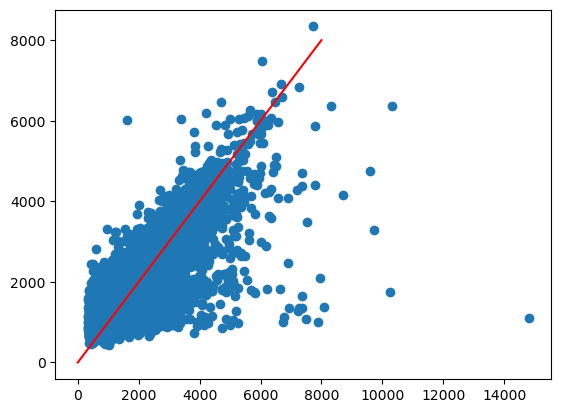

In [48]:
plt.figure()
# scatter plot of dataframe df with x column '5_PrixMoyen_M2' and y colum 'B_Prix_estimé_vois_median'
plt.scatter(df['5_PrixMoyen_M2'], df['B_Prix_estimé_vois_median'])
# add a red line x=y
plt.plot([0,8000], [0,8000], color='red')

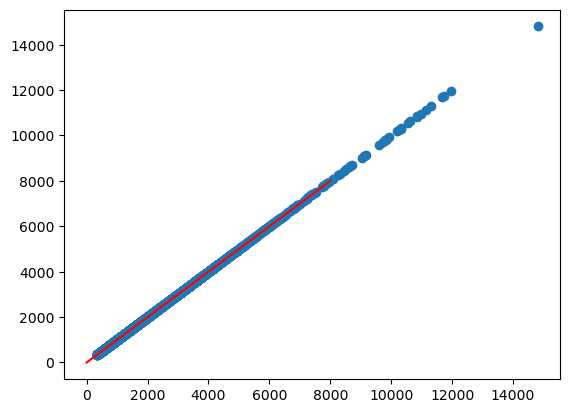

In [49]:
plt.figure()
# scatter plot of dataframe df with x column '5_PrixMoyen_M2' and y colum 'B_Prix_estimé_vois_median'
plt.scatter(df['5_PrixMoyen_M2'], df['B_Prix_consolidé_vois_median'])
# add a red line x=y
plt.plot([0,8000], [0,8000], color='red')

In [50]:
# Conclusion
# Au départ nous avions 9512 prix au m2 manquant
print(df.loc[df['5_PrixMoyen_M2'].isna(),sel_col].shape)
# Au final il nous reste 1742 prix au m2 manquant dans les estimations, soit par prix moyen, soit prix estimé
print(df[(df['A_Prix_estimé_vois_mean'].isna()) & (df['5_PrixMoyen_M2'].isna())].shape)
print(df[(df['A_Prix_consolidé_vois_mean'].isna())].shape)
# IL manque idem au nombre de lignes avec voisins manquants 1805
print(df[(df['6_insee_voisins'].isna())].shape)

(9512, 8)
(1742, 69)
(1742, 69)
(1805, 69)


In [51]:
# NOus avons donc par cette méthode un total de 34516 prix (moyen ou estimé)
print(df[(df['A_Prix_estimé_vois_mean'].notna()) | (df['5_PrixMoyen_M2'].notna())].shape)

(34514, 69)


In [52]:
# Total
print(df[(df['A_Prix_estimé_vois_mean'].isna())].shape[0]+df[(df['A_Prix_estimé_vois_mean'].notna())].shape[0])

36256


## C-Par moyenne et C1-mediane de toute la variable PAUL

In [53]:
df_m2['5_PrixMoyen_M2'].describe()

count    21315.000000
mean      1620.048135
std        817.529780
min        350.000000
25%       1098.000000
50%       1444.000000
75%       1920.500000
max      14803.000000
Name: 5_PrixMoyen_M2, dtype: float64

In [54]:
%%time
mean_value =  np.round(np.mean(df_m2.loc[df_m2['5_PrixMoyen_M2'].isna() == False, '5_PrixMoyen_M2']))
mean_value

CPU times: total: 0 ns
Wall time: 998 µs


1620.0

In [55]:
median_value = np.round(np.median(df_m2.loc[df_m2['5_PrixMoyen_M2'].isna() == False, '5_PrixMoyen_M2']))
median_value

1444.0

In [56]:
df_m2.loc['C_Prix_estime_mean'] = mean_value
df_m2.loc['C1_Prix_estime_median'] = median_value
df_m2.shape

(21317, 68)

In [57]:
df.loc['C_Prix_estime_mean'] = mean_value
df.loc['C1_Prix_estime_median'] = median_value

In [58]:
# Total
print(df[(df['C1_Prix_estime_median'].isna())].shape[0]+df[(df['C1_Prix_estime_median'].notna())].shape[0])

36258


## D-Par KNN OUMAR

In [59]:
# Delta= y_test - Y_pred

In [60]:
df_m2.columns

Index(['3_Code région', '3_Nom de la région', '3_Code département',
       '3_Code commune', '3_Nom de la commune', '3_Population municipale',
       '3_Population comptée à part', '3_Population totale',
       '3_Année recensement', '3_Année utilisation',
       '3_Code INSEE (commune ou arrondissement)',
       '3_Superficie de la commune', '3_Statut', '3_Code EPCI', '3_EPCI',
       '3_Densité_hab_par_km2', '5_ID', '5_INSEE_COM', '5_INSEE_DEP',
       '5_INSEE_REG', '5_CODE_EPCI', '5_NOM_COM_M', '5_POPULATION',
       '5_Nb_Ventes', '5_PrixMoyen_M2', '5_nb_digits_code_INSEE',
       '5_code_commune_n', '4_Code INSEE', '4_Code Postal', '4_Commune',
       '4_Département', '4_Région', '4_Statut', '4_Altitude Moyenne',
       '4_Superficie', '4_Population', '4_geo_point_2d', '4_geo_shape',
       '4_ID Geofla', '4_Code Commune', '4_Code Canton',
       '4_Code Arrondissement', '4_Code Département', '4_Code Région', '4_lat',
       '4_lon', '4_Densité_hab_par_km2', '6_insee', '6_nom', '

## E-Par KNeighborsRegressor OUMAR

### Prix m2

In [61]:
%%time
 
data1=df_m2[['3_Code région', '3_Code département', '3_Population comptée à part', 
             '3_Population totale','3_Statut','3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Superficie','4_Altitude Moyenne','4_lat','4_lon','5_PrixMoyen_M2']]
data1=data1.dropna()
data2=data1.sample(n=data1.shape[0],random_state=1)


data_train= data2[:16819]
data_test= data2[16820:data1.shape[0]]

X_train = data_train[['4_lat','4_lon']]
y_train=data_train[['5_PrixMoyen_M2']]
X_test = data_test[['4_lat','4_lon']]
y_test =data_test[['5_PrixMoyen_M2']]

CPU times: total: 0 ns
Wall time: 13.7 ms


In [62]:
%%time
# Créer un pipeline avec StandardScaler et KNeighborsRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Définir la grille des paramètres à rechercher
param_grid = {
    'knn__n_neighbors': [5, 10, 15, 20, 25]  # Différentes valeurs du nombre de voisins à essayer
}

# Créer un objet GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')

# Adapter GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres trouvés:", grid_search.best_params_)
print("Meilleur score sur la validation croisée:", grid_search.best_score_)

# Utiliser le modèle avec les meilleurs paramètres pour prédire sur les données de test
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Score sur les données de test avec les meilleurs paramètres:", test_score)

Meilleurs paramètres trouvés: {'knn__n_neighbors': 10}
Meilleur score sur la validation croisée: 0.6425582916558346
Score sur les données de test avec les meilleurs paramètres: 0.6573640046209639
CPU times: total: 281 ms
Wall time: 581 ms


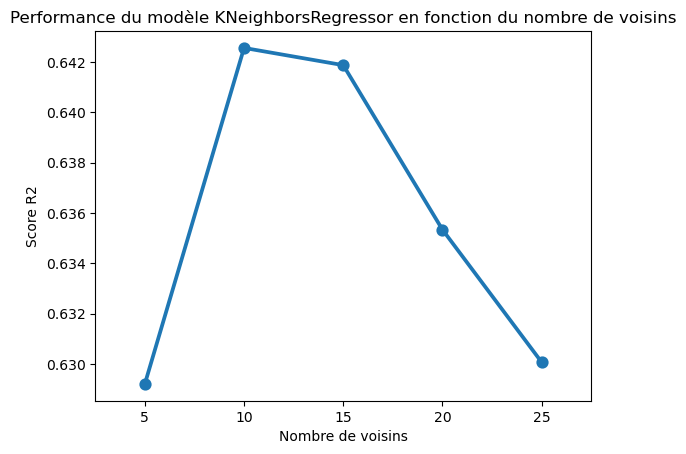

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extraire les valeurs de nombre de voisins testées et les scores correspondants
l_neighbors = [params['knn__n_neighbors'] for params in grid_search.cv_results_['params']]
res_knn_score = grid_search.cv_results_['mean_test_score']

# Tracer le graphique
sns.pointplot(x=l_neighbors, y=res_knn_score)
plt.xlabel('Nombre de voisins')
plt.ylabel('Score R2')
plt.title('Performance du modèle KNeighborsRegressor en fonction du nombre de voisins')
plt.show()


In [64]:
%%time
# On affine la recherche du meilleur KNN autour de 10
# Créer un pipeline avec StandardScaler et KNeighborsRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Définir la grille des paramètres à rechercher
param_grid = {
    'knn__n_neighbors': list(range(5, 15, 1))  # Différentes valeurs du nombre de voisins à essayer
}

# Créer un objet GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')

# Adapter GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres trouvés:", grid_search.best_params_)
print("Meilleur score sur la validation croisée:", grid_search.best_score_)

# Utiliser le modèle avec les meilleurs paramètres pour prédire sur les données de test
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Score sur les données de test avec les meilleurs paramètres:", test_score)

Meilleurs paramètres trouvés: {'knn__n_neighbors': 12}
Meilleur score sur la validation croisée: 0.6443801598275447
Score sur les données de test avec les meilleurs paramètres: 0.6592500525514516
CPU times: total: 516 ms
Wall time: 1.08 s


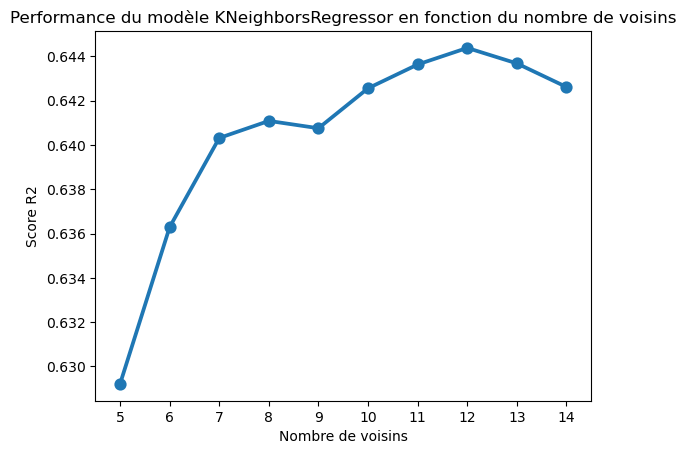

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extraire les valeurs de nombre de voisins testées et les scores correspondants
l_neighbors = [params['knn__n_neighbors'] for params in grid_search.cv_results_['params']]
res_knn_score = grid_search.cv_results_['mean_test_score']

# Tracer le graphique
sns.pointplot(x=l_neighbors, y=res_knn_score)
plt.xlabel('Nombre de voisins')
plt.ylabel('Score R2')
plt.title('Performance du modèle KNeighborsRegressor en fonction du nombre de voisins')
plt.show()


In [66]:
# Best Model
neigh = KNeighborsRegressor(n_neighbors=12)

neigh.fit(X_train, y_train)

neigh.score(X_test,y_test)

0.6587156755512178

In [67]:
data2.head()

,3_Code région,3_Code département,3_Population comptée à part,3_Population totale,3_Statut,3_Population municipale,3_Densité_hab_par_km2,3_Superficie de la commune,4_Superficie,4_Altitude Moyenne,4_lat,4_lon,5_PrixMoyen_M2
7304,24.0,28,6.0,245.0,Commune,239.0,37.876387,6.31,630.0,178.0,48.516098,1.388661,1787.0
3232,76.0,12,707.0,12601.0,Commune,11894.0,260.034980,45.74,4574.0,349.0,44.349916,2.031033,1497.0
22044,28.0,76,8.0,801.0,Commune,793.0,144.181818,5.50,550.0,138.0,49.971667,1.440854,1533.0
22400,11.0,77,57.0,1438.0,Commune,1381.0,97.322058,14.19,1419.0,142.0,48.985178,3.142183,2152.0
23443,32.0,80,1.0,141.0,Commune,140.0,21.772939,6.43,643.0,93.0,50.071319,2.052793,667.0


In [68]:
# df_no_na['E_Prix_estime_KNN']=best_model.predict(df_no_na[['4_lat','4_lon']])

In [69]:
df_no_na['E_Prix_estime_KNN']=neigh.predict(df_no_na[['4_lat','4_lon']])

In [70]:
df_no_na[['5_PrixMoyen_M2', 'E_Prix_estime_KNN']].head()

,5_PrixMoyen_M2,E_Prix_estime_KNN
0,1938.0,2089.833333
1,1130.0,1640.416667
2,2005.0,1754.000000
3,2442.0,2489.750000
4,1155.0,1335.000000


In [71]:
df_no_na.shape

(26678, 68)

In [72]:
# df['E_Prix_estime_KNN'] = np.nan
# df.loc[(df['4_lat'].notna()) | (df['4_lon'].notna()),'E_Prix_estime_KNN']=best_model.predict(df.loc[(df['4_lat'].notna()) | (df['4_lon'].notna()),['4_lat','4_lon']])

In [73]:
df['E_Prix_estime_KNN'] = np.nan
df.loc[(df['4_lat'].notna()) | (df['4_lon'].notna()),'E_Prix_estime_KNN']=neigh.predict(df.loc[(df['4_lat'].notna()) | (df['4_lon'].notna()),['4_lat','4_lon']])

In [74]:
# Conclusion
# NOus avions initialemment 8 lignes pour lesquelles la lat et lon manquaient
print(df[(df['4_lat'].isna()) & (df['4_lon'].isna())].shape)
# Soit un total de 32255 pour lesquelles nous avions les valeurs
print(df[(df['4_lat'].notna()) | (df['4_lon'].notna())].shape)
# Au final nous avons 32255 valeurs pour le KNN, donc 8 manquants
print(df[(df['E_Prix_estime_KNN'].isna())].shape)
print(df[(df['E_Prix_estime_KNN'].notna())].shape)

(0, 69)
(36258, 69)
(0, 69)
(36258, 69)


In [75]:
# Total
print(df[(df['E_Prix_estime_KNN'].isna())].shape[0]+df[(df['E_Prix_estime_KNN'].notna())].shape[0])

36258


In [76]:
# Nous allons créer la variable prix E_Prix_consolidé_KNN qui prend la valeur de Prix estimé KNN sauf quand le prix moyen existe
df.loc[:,'E_Prix_consolidé_KNN'] = df.loc[:,'E_Prix_estime_KNN']
df.loc[pd.notna(df['5_PrixMoyen_M2']),'E_Prix_consolidé_KNN'] = df.loc[pd.notna(df['5_PrixMoyen_M2']), '5_PrixMoyen_M2'] 
# On vérifie que l'imputantion est bone
df.loc[:20,['5_PrixMoyen_M2', 'E_Prix_estime_KNN', 'E_Prix_consolidé_KNN']]

,5_PrixMoyen_M2,E_Prix_estime_KNN,E_Prix_consolidé_KNN
0,1938.0,2089.833333,1938.000000
1,1130.0,1640.416667,1130.000000
2,2005.0,1754.000000,2005.000000
3,2442.0,2489.750000,2442.000000
4,1155.0,1335.000000,1155.000000
5,1963.0,1748.583333,1963.000000
6,1940.0,1917.666667,1940.000000
7,966.0,1322.250000,966.000000
8,1970.0,1935.833333,1970.000000
9,889.0,1741.583333,889.000000


### Nb_ventes

In [77]:
%%time
 
data1=df_m2[['3_Code région', '3_Code département', '3_Population comptée à part', 
             '3_Population totale','3_Statut','3_Population municipale', '3_Densité_hab_par_km2', 
             '3_Superficie de la commune', '4_Superficie','4_Altitude Moyenne','4_lat','4_lon',
             '5_PrixMoyen_M2', '5_Nb_Ventes']]
data1=data1.dropna()
data2=data1.sample(n=data1.shape[0],random_state=1)


data_train= data2[:16819]
data_test= data2[16820:data1.shape[0]]

X_train = data_train[['4_lat','4_lon']]
y_train=data_train[['5_Nb_Ventes']]
X_test = data_test[['4_lat','4_lon']]
y_test =data_test[['5_Nb_Ventes']]

CPU times: total: 0 ns
Wall time: 14 ms


In [78]:
%%time
# Créer un pipeline avec StandardScaler et KNeighborsRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Définir la grille des paramètres à rechercher
param_grid = {
    'knn__n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 50]  # Différentes valeurs du nombre de voisins à essayer
}

# Créer un objet GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')

# Adapter GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres trouvés:", grid_search.best_params_)
print("Meilleur score sur la validation croisée:", grid_search.best_score_)

# Utiliser le modèle avec les meilleurs paramètres pour prédire sur les données de test
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Score sur les données de test avec les meilleurs paramètres:", test_score)

Meilleurs paramètres trouvés: {'knn__n_neighbors': 30}
Meilleur score sur la validation croisée: 0.12233633983699495
Score sur les données de test avec les meilleurs paramètres: 0.10263402637184071
CPU times: total: 672 ms
Wall time: 1.24 s


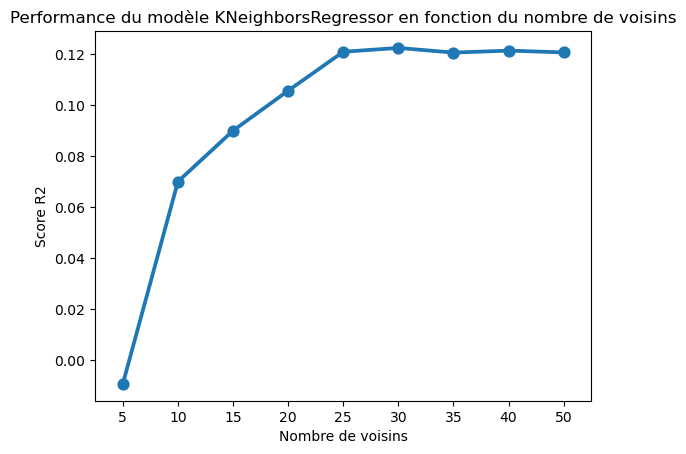

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extraire les valeurs de nombre de voisins testées et les scores correspondants
l_neighbors = [params['knn__n_neighbors'] for params in grid_search.cv_results_['params']]
res_knn_score = grid_search.cv_results_['mean_test_score']

# Tracer le graphique
sns.pointplot(x=l_neighbors, y=res_knn_score)
plt.xlabel('Nombre de voisins')
plt.ylabel('Score R2')
plt.title('Performance du modèle KNeighborsRegressor en fonction du nombre de voisins')
plt.show()


In [80]:
%%time
# On affine la recherche du meilleur KNN autour de 10
# Créer un pipeline avec StandardScaler et KNeighborsRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Définir la grille des paramètres à rechercher
param_grid = {
    'knn__n_neighbors': list(range(25, 35, 1))  # Différentes valeurs du nombre de voisins à essayer
}

# Créer un objet GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')

# Adapter GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres trouvés:", grid_search.best_params_)
print("Meilleur score sur la validation croisée:", grid_search.best_score_)

# Utiliser le modèle avec les meilleurs paramètres pour prédire sur les données de test
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Score sur les données de test avec les meilleurs paramètres:", test_score)

Meilleurs paramètres trouvés: {'knn__n_neighbors': 31}
Meilleur score sur la validation croisée: 0.12411415406652997
Score sur les données de test avec les meilleurs paramètres: 0.10177617004303574
CPU times: total: 625 ms
Wall time: 1.44 s


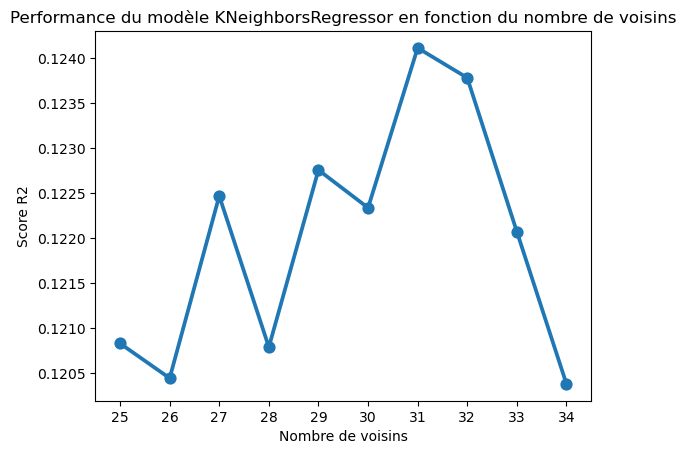

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extraire les valeurs de nombre de voisins testées et les scores correspondants
l_neighbors = [params['knn__n_neighbors'] for params in grid_search.cv_results_['params']]
res_knn_score = grid_search.cv_results_['mean_test_score']

# Tracer le graphique
sns.pointplot(x=l_neighbors, y=res_knn_score)
plt.xlabel('Nombre de voisins')
plt.ylabel('Score R2')
plt.title('Performance du modèle KNeighborsRegressor en fonction du nombre de voisins')
plt.show()


In [82]:
# Best Model
neigh = KNeighborsRegressor(n_neighbors=31)

neigh.fit(X_train, y_train)

neigh.score(X_test,y_test)

0.10159451281721388

In [83]:
df_no_na['E_NbVentes_estime_KNN']=neigh.predict(df_no_na[['4_lat','4_lon']])

In [84]:
df_no_na[['5_Nb_Ventes', 'E_NbVentes_estime_KNN']].head()

,5_Nb_Ventes,E_NbVentes_estime_KNN
0,7.0,6.161290
1,8.0,19.322581
2,168.0,19.387097
3,13.0,14.322581
4,1.0,7.741935


In [85]:
df_no_na.shape

(26678, 68)

In [86]:
# df['E_Prix_estime_KNN'] = np.nan
# df.loc[(df['4_lat'].notna()) | (df['4_lon'].notna()),'E_Prix_estime_KNN']=best_model.predict(df.loc[(df['4_lat'].notna()) | (df['4_lon'].notna()),['4_lat','4_lon']])

In [87]:
df['E_NbVentes_estime_KNN'] = np.nan
df.loc[(df['4_lat'].notna()) | (df['4_lon'].notna()),'E_NbVentes_estime_KNN']=neigh.predict(df.loc[(df['4_lat'].notna()) | (df['4_lon'].notna()),['4_lat','4_lon']])

In [88]:
# Conclusion
# NOus avions initialemment 8 lignes pour lesquelles la lat et lon manquaient
print(df[(df['4_lat'].isna()) & (df['4_lon'].isna())].shape)
# Soit un total de 32255 pour lesquelles nous avions les valeurs
print(df[(df['4_lat'].notna()) | (df['4_lon'].notna())].shape)
# Au final nous avons 32255 valeurs pour le KNN, donc 8 manquants
print(df[(df['E_NbVentes_estime_KNN'].isna())].shape)
print(df[(df['E_NbVentes_estime_KNN'].notna())].shape)

(0, 69)
(36258, 69)
(0, 69)
(36258, 69)


In [89]:
# Total
print(df[(df['E_NbVentes_estime_KNN'].isna())].shape[0]+df[(df['E_NbVentes_estime_KNN'].notna())].shape[0])

36258


In [90]:
# Nous allons créer la variable prix E_Prix_consolidé_KNN qui prend la valeur de Prix estimé KNN sauf quand le prix moyen existe
df.loc[:,'E_NbVentes_consolidé_KNN'] = df.loc[:,'E_NbVentes_estime_KNN']
df.loc[pd.notna(df['5_Nb_Ventes']),'E_NbVentes_consolidé_KNN'] = df.loc[pd.notna(df['5_Nb_Ventes']), '5_Nb_Ventes'] 
# On vérifie que l'imputantion est bone
df.loc[:20,['5_Nb_Ventes', 'E_NbVentes_estime_KNN', 'E_NbVentes_consolidé_KNN']]

,5_Nb_Ventes,E_NbVentes_estime_KNN,E_NbVentes_consolidé_KNN
0,7.0,6.161290,7.000000
1,8.0,19.322581,8.000000
2,168.0,19.387097,168.000000
3,13.0,14.322581,13.000000
4,1.0,7.741935,1.000000
5,37.0,18.741935,37.000000
6,4.0,18.516129,4.000000
7,2.0,8.548387,2.000000
8,17.0,5.967742,17.000000
9,1.0,16.032258,1.000000


## F-Par RandomForestRegressor PAUL

In [91]:
# pd.set_option('display.max_columns', None)
df_m2.head()
# pd.reset_option('max_columns')

,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,3_Année utilisation,...,G_Prix_estimé_LassoCV,E_Prix_estime_KNN,E_Prix_consolidé_KNN,F_Prix_consolidé_RFReg,E_NbVentes_estime_KNN,E_NbVentes_consolidé_KNN,F_NbVentes_estimé_RFReg,F_NbVentes_consolidé_RFReg,A_Prix_estimé_vois_mean,B_Prix_estimé_vois_median
0,84.0,Auvergne-Rhône-Alpes,01,1.0,L' Abergement-Clémenciat,767.0,18.0,785.0,2016.0,2019.0,...,1706.764487,2089.833333,1938.0,1938.0,6.161290,7.0,20.003477,7.0,NaN,NaN
1,84.0,Auvergne-Rhône-Alpes,01,2.0,L' Abergement-de-Varey,243.0,1.0,244.0,2016.0,2019.0,...,1697.845863,1640.416667,1130.0,1130.0,19.322581,8.0,15.800847,8.0,NaN,NaN
2,84.0,Auvergne-Rhône-Alpes,01,4.0,Ambérieu-en-Bugey,14081.0,437.0,14518.0,2016.0,2019.0,...,1971.821652,1754.000000,2005.0,2005.0,19.387097,168.0,15.888337,168.0,NaN,NaN
3,84.0,Auvergne-Rhône-Alpes,01,5.0,Ambérieux-en-Dombes,1671.0,34.0,1705.0,2016.0,2019.0,...,1732.167300,2489.750000,2442.0,2442.0,14.322581,13.0,18.492262,13.0,NaN,NaN
4,84.0,Auvergne-Rhône-Alpes,01,6.0,Ambléon,110.0,6.0,116.0,2016.0,2019.0,...,1701.189684,1335.000000,1155.0,1155.0,7.741935,1.0,16.968652,1.0,NaN,NaN


In [92]:
df_verif_na = df_m2.drop(['5_CODE_EPCI', '6_insee', '6_nom', '6_nb_voisins',
                          '6_insee_voisins', '6_noms_voisins', '6_cap_voisins'], axis=1)

In [93]:
# df_verif_na[df_verif_na.isna().any(axis=1)]

In [94]:
df_m2.columns

Index(['3_Code région', '3_Nom de la région', '3_Code département',
       '3_Code commune', '3_Nom de la commune', '3_Population municipale',
       '3_Population comptée à part', '3_Population totale',
       '3_Année recensement', '3_Année utilisation',
       '3_Code INSEE (commune ou arrondissement)',
       '3_Superficie de la commune', '3_Statut', '3_Code EPCI', '3_EPCI',
       '3_Densité_hab_par_km2', '5_ID', '5_INSEE_COM', '5_INSEE_DEP',
       '5_INSEE_REG', '5_CODE_EPCI', '5_NOM_COM_M', '5_POPULATION',
       '5_Nb_Ventes', '5_PrixMoyen_M2', '5_nb_digits_code_INSEE',
       '5_code_commune_n', '4_Code INSEE', '4_Code Postal', '4_Commune',
       '4_Département', '4_Région', '4_Statut', '4_Altitude Moyenne',
       '4_Superficie', '4_Population', '4_geo_point_2d', '4_geo_shape',
       '4_ID Geofla', '4_Code Commune', '4_Code Canton',
       '4_Code Arrondissement', '4_Code Département', '4_Code Région', '4_lat',
       '4_lon', '4_Densité_hab_par_km2', '6_insee', '6_nom', '

### Prix

In [95]:
%%time
from sklearn.ensemble import RandomForestRegressor 
# %%time
X_rf = df_m2[['4_lat','4_lon']]
y_rf = df_m2[['5_PrixMoyen_M2']]

l_profondeur = np.arange(13, 16, 1)
rf_score = []

for train, test in kf.split(X_rf):
    X_train = X_rf.iloc[train,:]
    y_train = y_rf.iloc[train]
    X_test = X_rf.iloc[test,:]
    y_test = y_rf.iloc[test]
    
    for prof in l_profondeur:
        rf = RandomForestRegressor(max_depth=prof, n_jobs = -1, random_state=0)
        # rf = make_pipeline(RandomForestRegressor(max_depth=prof, random_state=0, n_jobs = 10))
        rf.fit(X_train, y_train.values.ravel())
        rf_score.append(rf.score(X_test, y_test.values.ravel()))

res_rf_score = np.reshape(rf_score, [nb_kfold, l_profondeur.shape[0]])
res_rf_score = np.mean(res_rf_score, axis = 0)
indice_max = np.unravel_index(np.argmax(res_rf_score), res_rf_score.shape)
print('Indices Best score :', indice_max)
print('Best score :', np.max(res_rf_score))
print('Profondeur best score :', l_profondeur[indice_max])


Indices Best score : (1,)
Best score : 0.6429820736692424
Profondeur best score : 14
CPU times: total: 2min 57s
Wall time: 28.2 s


<Axes: >

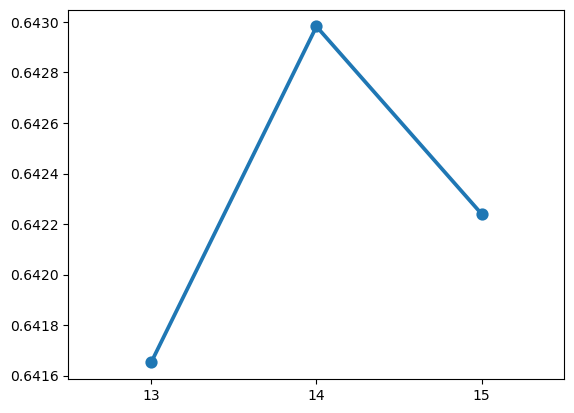

In [96]:
sns.pointplot(x=l_profondeur, y=res_rf_score)

In [97]:
rf = RandomForestRegressor(max_depth=14, n_jobs = -1, random_state=0)
rf.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=14, n_jobs=-1, random_state=0)

In [98]:
rf.score(X_test, y_test.values.ravel())

0.6412179978064413

In [99]:
%%time
df_no_na['F_Prix_estimé_RFReg'] = np.nan
features_RF = ['4_lat','4_lon']
df_no_na['F_Prix_estimé_RFReg']=rf.predict(df_no_na[['4_lat','4_lon']])

CPU times: total: 188 ms
Wall time: 85.3 ms


In [100]:
df_m2.loc[:50,['5_PrixMoyen_M2','F_Prix_estimé_RFReg']]

,5_PrixMoyen_M2,F_Prix_estimé_RFReg
0,1938.0,1982.906252
1,1130.0,1498.086511
2,2005.0,1901.663645
3,2442.0,2530.235014
4,1155.0,1292.702956
5,1963.0,1908.537867
7,966.0,1396.362508
8,1970.0,2035.825841
9,889.0,1252.355422
10,1185.0,1498.792381


In [101]:
df['F_Prix_estimé_RFReg'] = np.nan
df.loc[(df['4_lat'].notna()) | (df['4_lon'].notna()),'F_Prix_estimé_RFReg']=rf.predict(df.loc[(df['4_lat'].notna()) | (df['4_lon'].notna()),['4_lat','4_lon']])

In [102]:
# Conclusion
# NOus avions initialemment 8 lignes pour lesquelles la lat et lon manquaient
print(df[(df['4_lat'].isna()) & (df['4_lon'].isna())].shape)
# Soit un total de 32255 pour lesquelles nous avions les valeurs
print(df[(df['4_lat'].notna()) | (df['4_lon'].notna())].shape)
# Au final nous avons 36255 valeurs pour le KNN, donc 8 manquants
print(df[(df['F_Prix_estimé_RFReg'].isna())].shape)
print(df[(df['F_Prix_estimé_RFReg'].notna())].shape)

(0, 69)
(36258, 69)
(0, 69)
(36258, 69)


In [103]:
# Total
print(df[(df['F_Prix_estimé_RFReg'].isna())].shape[0]+df[(df['F_Prix_estimé_RFReg'].notna())].shape[0])

36258


In [104]:
# Nous allons créer la variable prix F_Prix_consolidé_RFReg qui prend la valeur de F_Prix_estimé_RFReg sauf quand le prix moyen existe
df.loc[:,'F_Prix_consolidé_RFReg'] = df.loc[:,'F_Prix_estimé_RFReg']
df.loc[pd.notna(df['5_PrixMoyen_M2']),'F_Prix_consolidé_RFReg'] = df.loc[pd.notna(df['5_PrixMoyen_M2']), '5_PrixMoyen_M2'] 
# On vérifie que l'imputantion est bone
df.loc[:20,['5_PrixMoyen_M2', 'F_Prix_estimé_RFReg', 'F_Prix_consolidé_RFReg']]

,5_PrixMoyen_M2,F_Prix_estimé_RFReg,F_Prix_consolidé_RFReg
0,1938.0,1982.906252,1938.000000
1,1130.0,1498.086511,1130.000000
2,2005.0,1901.663645,2005.000000
3,2442.0,2530.235014,2442.000000
4,1155.0,1292.702956,1155.000000
5,1963.0,1908.537867,1963.000000
6,1940.0,1851.336067,1940.000000
7,966.0,1396.362508,966.000000
8,1970.0,2035.825841,1970.000000
9,889.0,1252.355422,889.000000


### 5_Nb_Ventes

In [105]:
df['5_Nb_Ventes'].describe()

count    26746.000000
mean        24.724146
std        129.775052
min          1.000000
25%          2.000000
50%          5.000000
75%         13.000000
max       7411.000000
Name: 5_Nb_Ventes, dtype: float64

(array([2.5348e+04, 6.8600e+02, 2.3000e+02, 1.3600e+02, 8.2000e+01,
        5.2000e+01, 4.4000e+01, 3.0000e+01, 1.8000e+01, 1.8000e+01,
        1.2000e+01, 1.3000e+01, 8.0000e+00, 1.1000e+01, 8.0000e+00,
        4.0000e+00, 5.0000e+00, 2.0000e+00, 2.0000e+00, 5.0000e+00,
        2.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

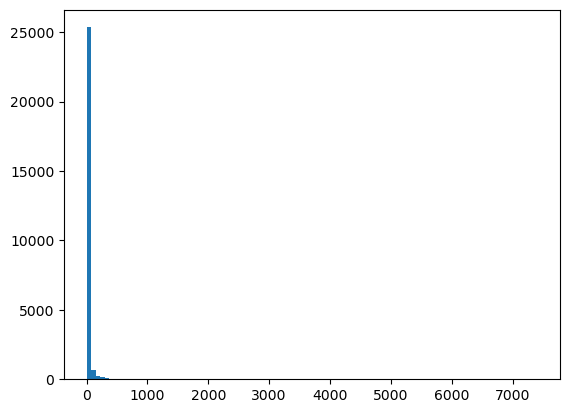

In [106]:
# Histogramm of df['5_Nb_Ventes'] with bin width 100
plt.hist(df['5_Nb_Ventes'], bins=100)

In [107]:
%%time
from sklearn.ensemble import RandomForestRegressor 
# %%time
X_rf = df_m2[['4_lat','4_lon']]
y_rf = df_m2[['5_Nb_Ventes']]

l_profondeur = np.arange(1, 25, 5)
rf_score = []

for train, test in kf.split(X_rf):
    X_train = X_rf.iloc[train,:]
    y_train = y_rf.iloc[train]
    X_test = X_rf.iloc[test,:]
    y_test = y_rf.iloc[test]
    
    for prof in l_profondeur:
        rf = RandomForestRegressor(max_depth=prof, n_jobs = -1, random_state=0)
        # rf = make_pipeline(RandomForestRegressor(max_depth=prof, random_state=0, n_jobs = 10))
        rf.fit(X_train, y_train.values.ravel())
        rf_score.append(rf.score(X_test, y_test.values.ravel()))

res_rf_score = np.reshape(rf_score, [nb_kfold, l_profondeur.shape[0]])
res_rf_score = np.mean(res_rf_score, axis = 0)
indice_max = np.unravel_index(np.argmax(res_rf_score), res_rf_score.shape)
print('Indices Best score :', indice_max)
print('Best score :', np.max(res_rf_score))
print('Profondeur best score :', l_profondeur[indice_max])


Indices Best score : (2,)
Best score : 0.031684140047616216
Profondeur best score : 11
CPU times: total: 3min 53s
Wall time: 39 s


<Axes: >

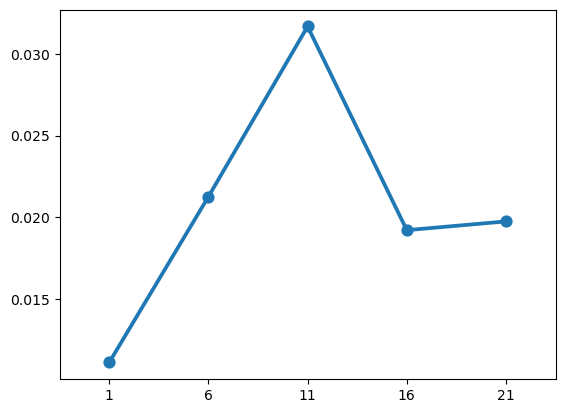

In [108]:
sns.pointplot(x=l_profondeur, y=res_rf_score)

In [109]:
rf = RandomForestRegressor(max_depth=11, n_jobs = -1, random_state=0)
rf.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=11, n_jobs=-1, random_state=0)

In [110]:
rf.score(X_test, y_test.values.ravel())

-0.12937312654942135

In [111]:
%%time
df_no_na['F_NbVentes_estimé_RFReg'] = np.nan
features_RF = ['4_lat','4_lon']
df_no_na['F_NbVentes_estimé_RFReg']=rf.predict(df_no_na[['4_lat','4_lon']])

CPU times: total: 31.2 ms
Wall time: 53.1 ms


In [112]:
df_no_na.loc[:50,['5_Nb_Ventes','F_NbVentes_estimé_RFReg']]

,5_Nb_Ventes,F_NbVentes_estimé_RFReg
0,7.0,20.003477
1,8.0,15.800847
2,168.0,15.888337
3,13.0,18.492262
4,1.0,16.968652
5,37.0,15.800847
6,4.0,15.888337
7,2.0,18.767517
8,17.0,16.678876
9,1.0,22.661770


In [113]:
df['F_NbVentes_estimé_RFReg'] = np.nan
df.loc[(df['4_lat'].notna()) | (df['4_lon'].notna()),'F_NbVentes_estimé_RFReg']=rf.predict(df.loc[(df['4_lat'].notna()) | (df['4_lon'].notna()),['4_lat','4_lon']])

In [114]:
# Conclusion
# NOus avions initialemment 8 lignes pour lesquelles la lat et lon manquaient
print(df[(df['4_lat'].isna()) & (df['4_lon'].isna())].shape)
# Soit un total de 32255 pour lesquelles nous avions les valeurs
print(df[(df['4_lat'].notna()) | (df['4_lon'].notna())].shape)
# Au final nous avons 36255 valeurs pour le KNN, donc 8 manquants
print(df[(df['F_NbVentes_estimé_RFReg'].isna())].shape)
print(df[(df['F_NbVentes_estimé_RFReg'].notna())].shape)

(0, 69)
(36258, 69)
(0, 69)
(36258, 69)


In [115]:
# Total
print(df[(df['F_NbVentes_estimé_RFReg'].isna())].shape[0]+df[(df['F_NbVentes_estimé_RFReg'].notna())].shape[0])

36258


In [116]:
# Nous allons créer la variable prix F_Prix_consolidé_RFReg qui prend la valeur de F_Prix_estimé_RFReg sauf quand le prix moyen existe
df.loc[:,'F_NbVentes_consolidé_RFReg'] = df.loc[:,'F_NbVentes_estimé_RFReg']
df.loc[pd.notna(df['5_Nb_Ventes']),'F_NbVentes_consolidé_RFReg'] = df.loc[pd.notna(df['5_Nb_Ventes']), '5_Nb_Ventes'] 
# On vérifie que l'imputantion est bone
df.loc[:20,['5_Nb_Ventes', 'F_NbVentes_estimé_RFReg', 'F_NbVentes_consolidé_RFReg']]

,5_Nb_Ventes,F_NbVentes_estimé_RFReg,F_NbVentes_consolidé_RFReg
0,7.0,20.003477,7.000000
1,8.0,15.800847,8.000000
2,168.0,15.888337,168.000000
3,13.0,18.492262,13.000000
4,1.0,16.968652,1.000000
5,37.0,15.800847,37.000000
6,4.0,15.888337,4.000000
7,2.0,18.767517,2.000000
8,17.0,16.678876,17.000000
9,1.0,22.661770,1.000000


-------------------------------

## G-Par Lasso CV NICOLAS

In [117]:
# Sélection des caractéristiques
features = ['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune', '4_Altitude Moyenne','4_lat','4_lon']

In [118]:
y = df_m2['5_PrixMoyen_M2']
X = df_m2[['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune',
              '4_Altitude Moyenne','4_lat','4_lon']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
num_features = ['3_Population municipale', '3_Densité_hab_par_km2', '3_Superficie de la commune',
              '4_Altitude Moyenne','4_lat','4_lon']
cat_features = []

for c in cat_features:
    X[c] = X[c].astype(object)

In [120]:
X.dtypes

3_Population municipale       float64
3_Densité_hab_par_km2         float64
3_Superficie de la commune    float64
4_Altitude Moyenne            float64
4_lat                         float64
4_lon                         float64
dtype: object

In [121]:
numeric_transformer = Pipeline(
    steps=[ 
        ("scaler", StandardScaler()),
    ])

categorical_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))
          ])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features),
    ])

In [122]:
%%time
lasso_opti= Pipeline(
    steps=[
            ("preprocessor", preprocessor), 
           ("lassoCV", LassoCV(cv=5, random_state=0))])#BayesianRidge())]) #
lasso_opti.fit(X_train, y_train)
y_pred = lasso_opti.predict(X_test)

CPU times: total: 188 ms
Wall time: 207 ms


In [123]:
lasso_opti.named_steps.lassoCV.alphas_

array([305.01081091, 284.45410309, 265.28284857, 247.40367245,
       230.72949296, 215.17909736, 200.67674638, 187.15180531,
       174.53840001, 162.77509601, 151.80459933, 141.5734774 ,
       132.03189886, 123.13339077, 114.83461234, 107.09514381,
        99.87728955,  93.14589451,  86.86817297,  81.01354885,
        75.5535068 ,  70.46145331,  65.71258719,  61.28377874,
        57.15345716,  53.30150544,  49.70916236,  46.35893119,
        43.23449439,  40.32063417,  37.60315837,  35.06883135,
        32.70530949,  30.50108109,  28.44541031,  26.52828486,
        24.74036725,  23.0729493 ,  21.51790974,  20.06767464,
        18.71518053,  17.45384   ,  16.2775096 ,  15.18045993,
        14.15734774,  13.20318989,  12.31333908,  11.48346123,
        10.70951438,   9.98772896,   9.31458945,   8.6868173 ,
         8.10135489,   7.55535068,   7.04614533,   6.57125872,
         6.12837787,   5.71534572,   5.33015054,   4.97091624,
         4.63589312,   4.32344944,   4.03206342,   3.76

In [124]:
lasso_opti.named_steps.lassoCV.alpha_

0.3050108109076089

In [125]:
print("mse",mean_squared_error(y_test, y_pred))
print("r2", r2_score(y_test, y_pred))

mse 566622.417087638
r2 0.1334124481456257


In [126]:
df_m2.loc[df_m2[features].isna().any(axis=1),features]

,3_Population municipale,3_Densité_hab_par_km2,3_Superficie de la commune,4_Altitude Moyenne,4_lat,4_lon


In [127]:
features

['3_Population municipale',
 '3_Densité_hab_par_km2',
 '3_Superficie de la commune',
 '4_Altitude Moyenne',
 '4_lat',
 '4_lon']

In [128]:
%%time
df_no_na['G_Prix_estimé_LassoCV'] = np.nan
df_no_na['G_Prix_estimé_LassoCV'] = lasso_opti.predict(df_no_na[features])

CPU times: total: 0 ns
Wall time: 8.7 ms


In [129]:
df_m2.loc[:40,['5_PrixMoyen_M2', 'G_Prix_estimé_LassoCV'] ]

,5_PrixMoyen_M2,G_Prix_estimé_LassoCV
0,1938.0,1706.764487
1,1130.0,1697.845863
2,2005.0,1971.821652
3,2442.0,1732.167300
4,1155.0,1701.189684
5,1963.0,1746.912195
7,966.0,1744.603823
8,1970.0,1705.637724
9,889.0,1654.072616
10,1185.0,1667.421860


In [130]:
df['G_Prix_estimé_LassoCV'] = np.nan
df.loc[df[features].notna().all(axis=1),'G_Prix_estimé_LassoCV']=lasso_opti.predict(df.loc[df[features].notna().all(axis=1),features])

In [131]:
# Conclusion
# NOus avions initialemment 826 lignes pour lesquelles une des features manquanient
print(df[df[features].isna().any(axis=1)].shape)
# Soit un total de 35437 pour lesquelles nous avions les valeurs
print(df[df[features].notna().all(axis=1)].shape)
# Au final nous avons 35437 valeurs pour le lasso, donc 826 manquants
print(df[(df['G_Prix_estimé_LassoCV'].isna())].shape)
print(df[(df['G_Prix_estimé_LassoCV'].notna())].shape)

(821, 69)
(35437, 69)
(821, 69)
(35437, 69)


## Comparaison des différents du prix moyen au m2 NICOLAS

In [132]:
# Valeurs uniques par colonne
df_analyse = []
manquantes = df_no_na.isna().sum()
for t in df_no_na.columns:
    row = {}
    row['Variable']=t
    row['type']= df_no_na[t].dtypes
    row['Nb_val_unique']=len(df_no_na[t].unique())
    row['Nb_manquant']=manquantes[t]
    df_analyse.append(row)
df_analyse = pd.DataFrame(df_analyse)
df_analyse.sort_values(by='Nb_manquant',ascending=False)

,Variable,type,Nb_val_unique,Nb_manquant
67,B_Prix_estimé_vois_median,float64,6840,54
66,A_Prix_estimé_vois_mean,float64,22222,54
42,4_Code Département,category,90,0
48,6_nom,object,25192,0
47,6_insee,object,26678,0
46,4_Densité_hab_par_km2,float64,16394,0
45,4_lon,float64,26678,0
44,4_lat,float64,26678,0
43,4_Code Région,category,20,0
41,4_Code Arrondissement,float64,7,0


In [135]:
def performance_of_simulations(df, titre, list_of_sim):

    list_of_col = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal']
    
    print(f"{'RAPPEL: Nombre de prix moyen total / manquants:':50} {len(df)} / {len(df[df['5_PrixMoyen_M2'].isna()])}")
    
    plt.figure(figsize=(15,3.5*len(list_of_sim)))
    plt.suptitle(titre)
    
    for i,p in enumerate(list_of_sim):
        
        print(f"{'Simulation:':50} {p}")
        print(f"{'Nombre de prix estimés:':50} {len(df[df[p].notna()])}")

        df_eval = df.loc[index_to_remove,:].copy()
        df_not_NA = df_eval[(df_eval[p].notna()) & df_eval['5_PrixMoyen_M2'].notna()].copy()
        # df_not_NA = df[(df[p].notna()) & df['5_PrixMoyen_M2'].notna()].copy()
        print(f"{'Nombre de prix pour la comparaison:':50} {len(df_not_NA)}")
        
        mse = mean_squared_error( df_not_NA['5_PrixMoyen_M2'], df_not_NA[p])
        r2 = r2_score( df_not_NA['5_PrixMoyen_M2'], df_not_NA[p])
        
        df_not_NA['Delta_PrixMoyen_VS_estimé'] = df_not_NA[p] - df_not_NA['5_PrixMoyen_M2']

        plt.subplot(len(list_of_sim),3,3*i+1)
        sns.scatterplot(data=df_not_NA, x='5_PrixMoyen_M2', y=p, color=list_of_col[i])
        sns.lineplot(x=[0,10000], y=[0,10000],color='r')
        top = plt.gca().get_ylim()[1]
        plt.text(0, top-1000, s=p)
        plt.text(0,top-2000,s=f"mse: {round(mse)}")
        plt.text(0,top-3000,s=f"r2: {round(r2,3)}")
        if i<len(list_of_sim)-1: 
            plt.xlabel('')
        else:
            plt.xlabel('5_PrixMoyen_M2')

        plt.subplot(len(list_of_sim),3,3*i+2) 
        sns.histplot(x=df_not_NA['Delta_PrixMoyen_VS_estimé'], color=list_of_col[i])
        plt.xlim(-3000,3000)
        if i<len(list_of_sim)-1: 
            plt.xlabel('')
        else:
            plt.xlabel('Delta_PrixMoyen_VS_estimé')

        plt.subplot(len(list_of_sim),3,3*i+3)
        sns.boxplot(x=df_not_NA['Delta_PrixMoyen_VS_estimé'],orient='h', color=list_of_col[i])
        if i<len(list_of_sim)-1: 
            plt.xlabel('')
        else:
            plt.xlabel('Delta_PrixMoyen_VS_estimé')
        plt.xlim(-6000,6000)
        plt.text(-5500, -0.4, f"Mediane  :{round(np.median(df_not_NA['Delta_PrixMoyen_VS_estimé']))}")
        plt.text(-5500, -0.3, f"1st Qart.:{round(np.percentile(df_not_NA['Delta_PrixMoyen_VS_estimé'],25))}")
        plt.text(-5500, -0.2, f"3rd Qart.:{round(np.percentile(df_not_NA['Delta_PrixMoyen_VS_estimé'],75))}")
        plt.text(-5500, -0.1, f"IQR      :{round(np.percentile(df_not_NA['Delta_PrixMoyen_VS_estimé'],75)-np.percentile(df_not_NA['Delta_PrixMoyen_VS_estimé'],25))}")
        # print('Analyse de l"écart entre Prix Moyen réel et prix estimé')
        # print(df_not_NA['Delta_PrixMoyen_VS_estimé'].describe()) #
    plt.savefig("Comparaison des estimations du prix au M2.png")
    plt.show()

def performance_of_simulations2(df, titre, list_of_sim):

    list_of_col = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal']
    
    print(f"{'RAPPEL: Nombre de prix moyen total / manquants:':50} {len(df)} / {len(df[df['5_PrixMoyen_M2'].isna()])}")
    
    plt.figure(figsize=(15,3.5*len(list_of_sim)))
    plt.suptitle(titre)
    
    for i,p in enumerate(list_of_sim):
        
        print(f"{'Simulation:':50} {p}")
        print(f"{'Nombre de prix estimés:':50} {len(df[df[p].notna()])}")

        df_eval = df.loc[index_to_remove,:].copy()
        df_not_NA = df_eval[(df_eval[p].notna()) & df_eval['5_PrixMoyen_M2'].notna()].copy()
        # df_not_NA = df[(df[p].notna()) & df['5_PrixMoyen_M2'].notna()].copy()
        print(f"{'Nombre de prix pour la comparaison:':50} {len(df_not_NA)}")
        
        mse = mean_squared_error( df_not_NA['5_PrixMoyen_M2'], df_not_NA[p])
        r2 = r2_score( df_not_NA['5_PrixMoyen_M2'], df_not_NA[p])
        
        df_not_NA['Delta_PrixMoyen_VS_estimé'] = df_not_NA[p] - df_not_NA['5_PrixMoyen_M2']

        plt.subplot(len(list_of_sim),2,2*i+1)
        sns.scatterplot(data=df_not_NA, x='5_PrixMoyen_M2', y=p, color=list_of_col[i])
        sns.lineplot(x=[0,10000], y=[0,10000],color='r')
        top = plt.gca().get_ylim()[1]
        plt.text(0, top-1000, s=p)
        plt.text(0,top-2000,s=f"mse: {round(mse)}")
        plt.text(0,top-3000,s=f"r2: {round(r2,3)}")
        if i<len(list_of_sim)-1: 
            plt.xlabel('')
        else:
            plt.xlabel('5_PrixMoyen_M2')

        plt.subplot(len(list_of_sim),2,2*i+2)
        sns.violinplot(y=df_not_NA['Delta_PrixMoyen_VS_estimé'],orient='v', color=list_of_col[i])
        if i<len(list_of_sim)-1: 
            plt.xlabel('')
        else:
            plt.xlabel('Delta_PrixMoyen_VS_estimé')
        plt.ylim(-8000,8000)
        plt.text(-0.4, 7000, f"Mediane  :{round(np.median(df_not_NA['Delta_PrixMoyen_VS_estimé']))}")
        plt.text(-0.4, 6000, f"1st Qart.:{round(np.percentile(df_not_NA['Delta_PrixMoyen_VS_estimé'],25))}")
        plt.text(-0.4, 5000, f"3rd Qart.:{round(np.percentile(df_not_NA['Delta_PrixMoyen_VS_estimé'],75))}")
        plt.text(-0.4, 4000, f"IQR      :{round(np.percentile(df_not_NA['Delta_PrixMoyen_VS_estimé'],75)-np.percentile(df_not_NA['Delta_PrixMoyen_VS_estimé'],25))}")
        # print('Analyse de l"écart entre Prix Moyen réel et prix estimé')
        # print(df_not_NA['Delta_PrixMoyen_VS_estimé'].describe()) #
    plt.savefig("Comparaison des estimations du prix au M2-2.png")
    plt.show()

RAPPEL: Nombre de prix moyen total / manquants:    6000 / 0
Simulation:                                        A_Prix_estimé_vois_mean
Nombre de prix estimés:                            5989
Nombre de prix pour la comparaison:                7367
Simulation:                                        B_Prix_estimé_vois_median
Nombre de prix estimés:                            5989
Nombre de prix pour la comparaison:                7367
Simulation:                                        C_Prix_estime_mean
Nombre de prix estimés:                            6000
Nombre de prix pour la comparaison:                7378
Simulation:                                        C1_Prix_estime_median
Nombre de prix estimés:                            6000
Nombre de prix pour la comparaison:                7378
Simulation:                                        E_Prix_estime_KNN
Nombre de prix estimés:                            6000
Nombre de prix pour la comparaison:                7378
Simulation:     

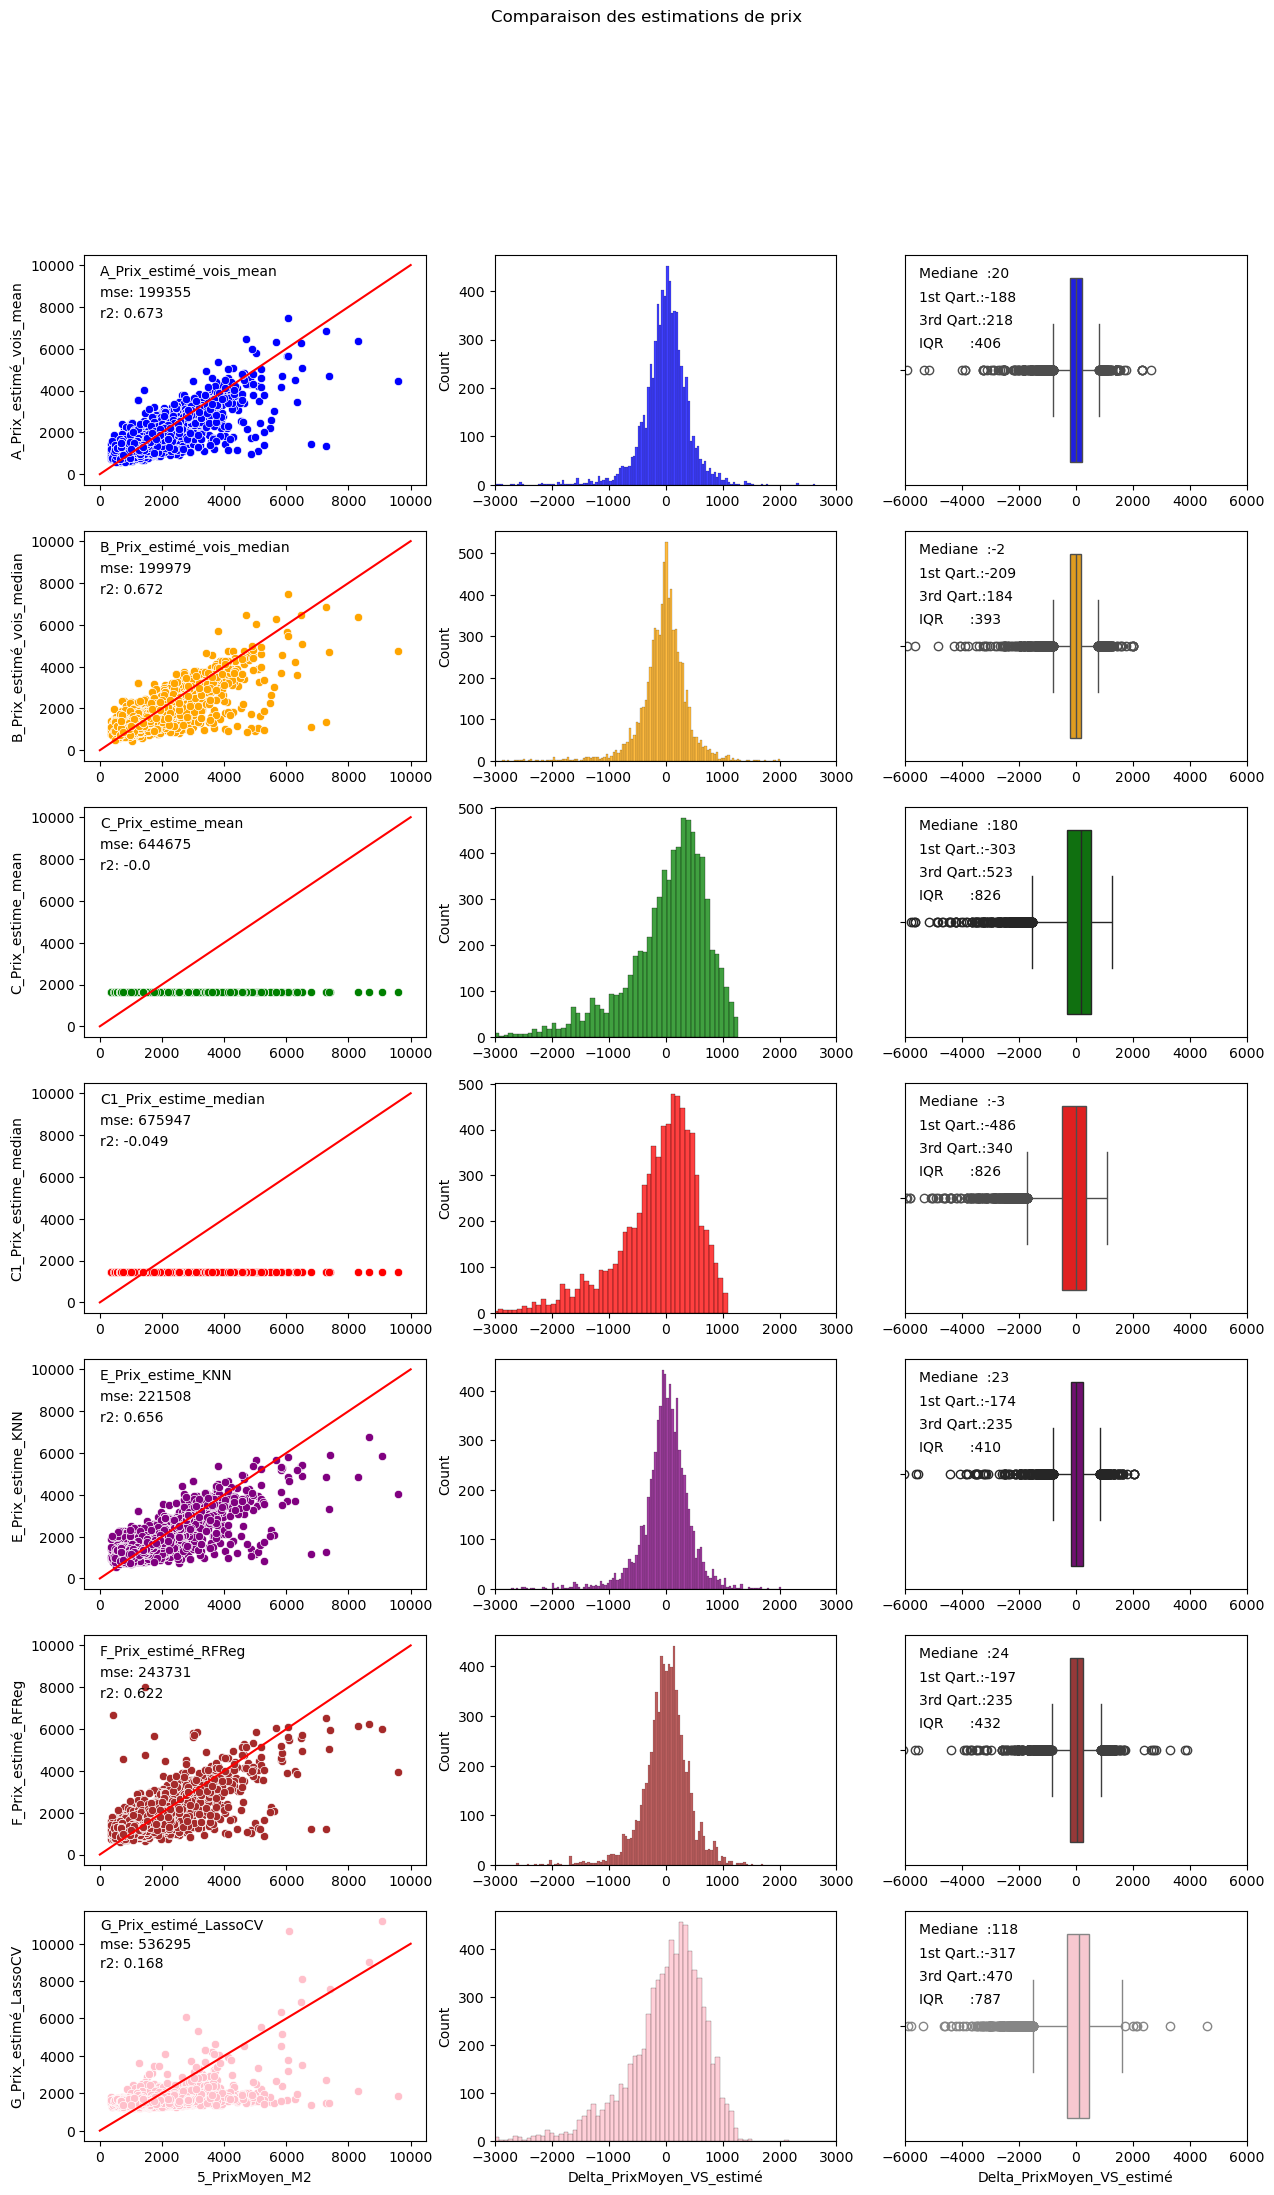

In [136]:
performance_of_simulations(df_no_na.loc[index_to_remove],'Comparaison des estimations de prix',  
                           ['A_Prix_estimé_vois_mean', 'B_Prix_estimé_vois_median', 
                            'C_Prix_estime_mean', 
                            'C1_Prix_estime_median',
                            'E_Prix_estime_KNN',
                            'F_Prix_estimé_RFReg',  
                            #'F_Prix_estimé_RFReg2',
                            'G_Prix_estimé_LassoCV'
                           ])

RAPPEL: Nombre de prix moyen total / manquants:    6000 / 0
Simulation:                                        A_Prix_estimé_vois_mean
Nombre de prix estimés:                            5989
Nombre de prix pour la comparaison:                7367
Simulation:                                        B_Prix_estimé_vois_median
Nombre de prix estimés:                            5989
Nombre de prix pour la comparaison:                7367
Simulation:                                        C_Prix_estime_mean
Nombre de prix estimés:                            6000
Nombre de prix pour la comparaison:                7378
Simulation:                                        C1_Prix_estime_median
Nombre de prix estimés:                            6000
Nombre de prix pour la comparaison:                7378
Simulation:                                        E_Prix_estime_KNN
Nombre de prix estimés:                            6000
Nombre de prix pour la comparaison:                7378
Simulation:     

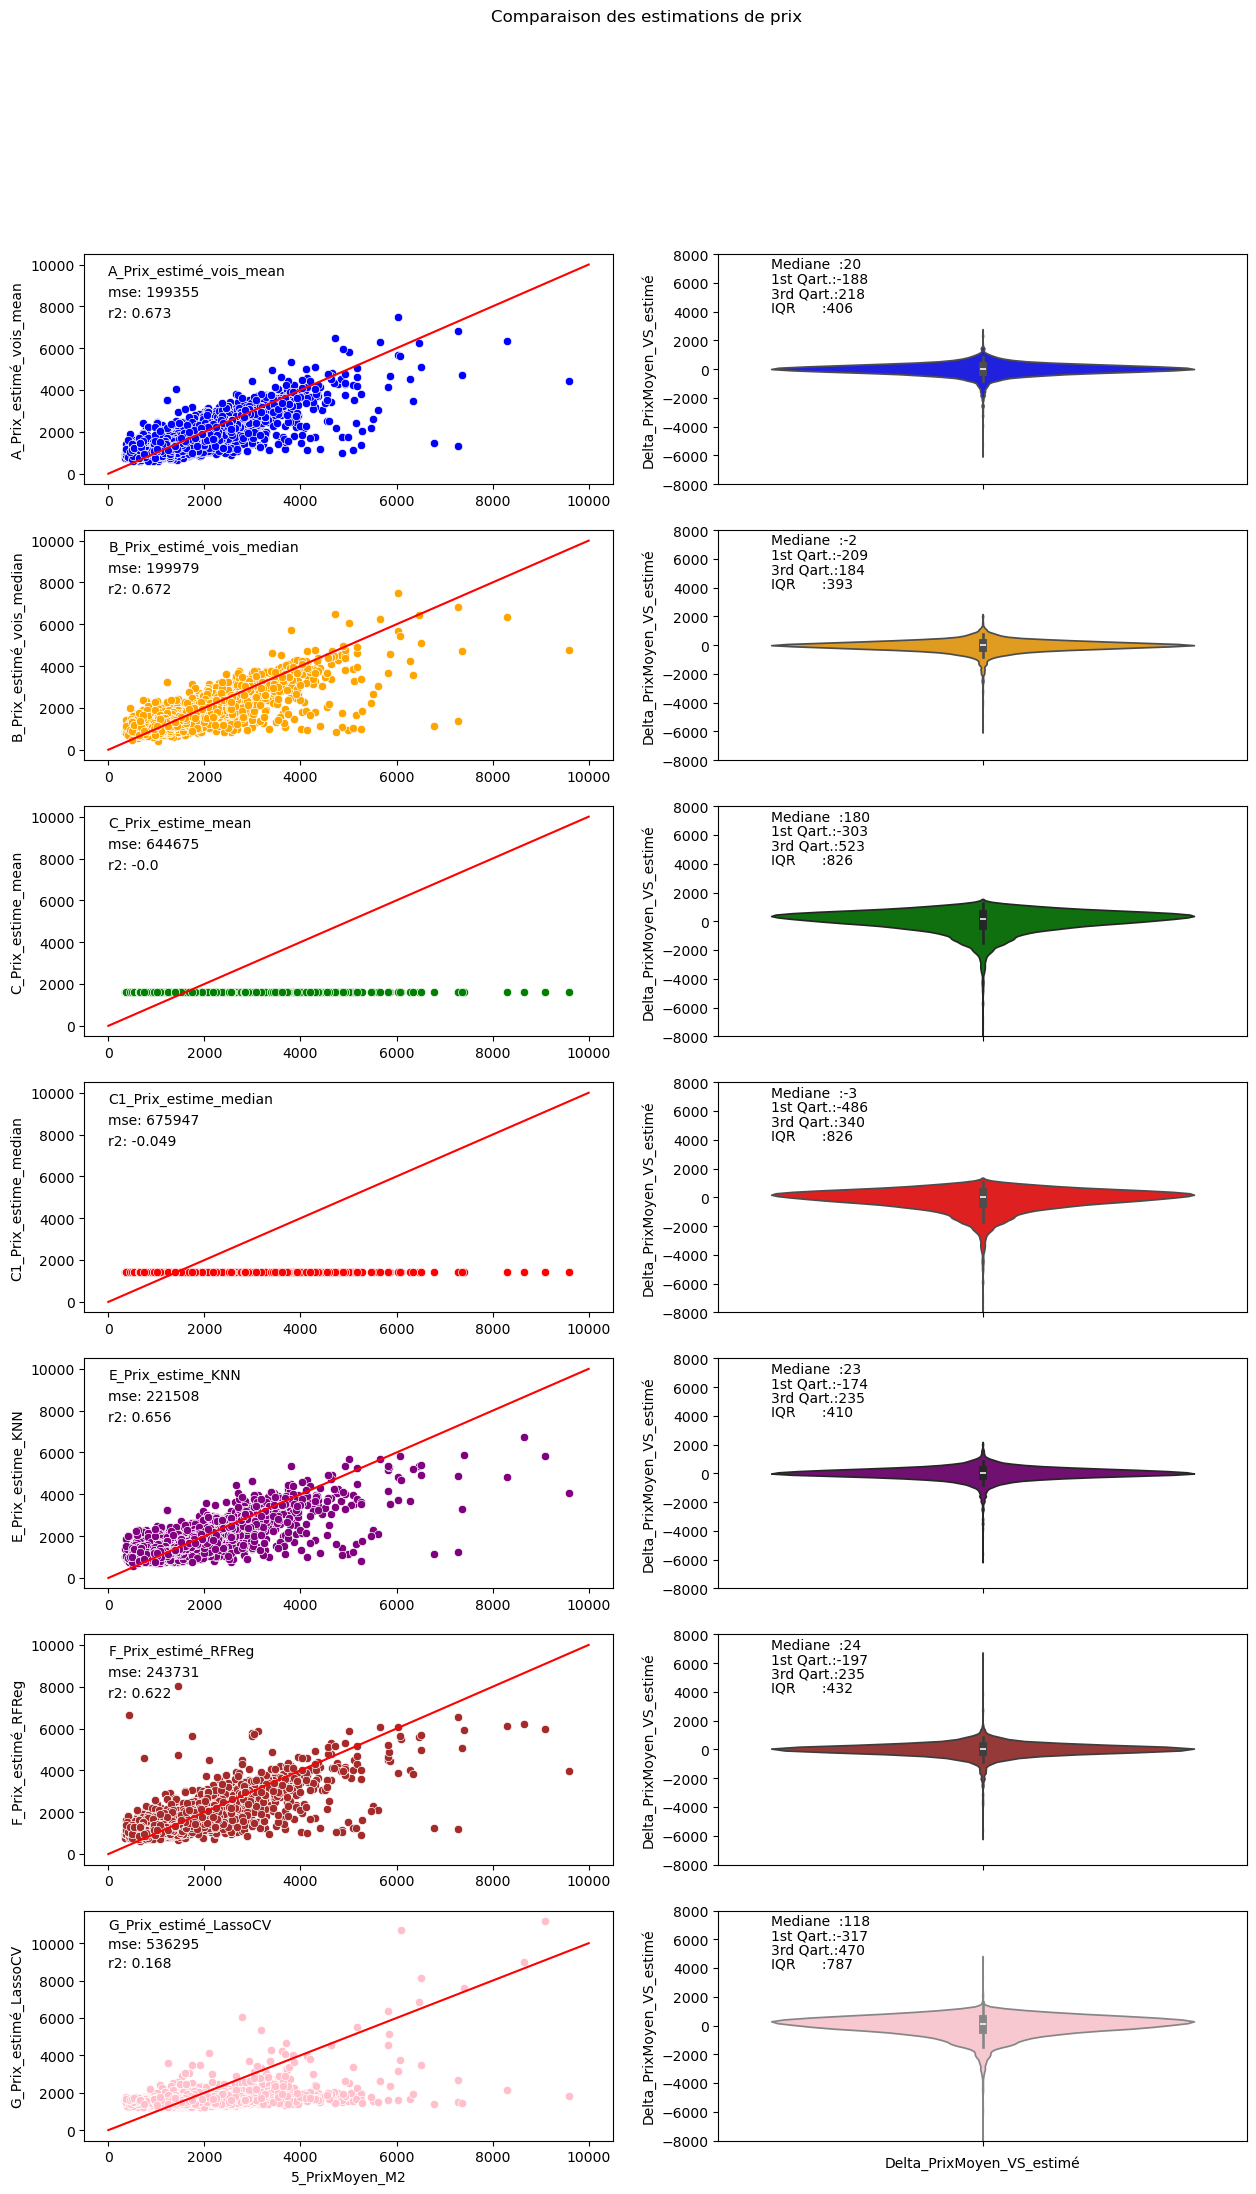

In [137]:
performance_of_simulations2(df_no_na.loc[index_to_remove],'Comparaison des estimations de prix',  
                           ['A_Prix_estimé_vois_mean', 'B_Prix_estimé_vois_median', 
                            'C_Prix_estime_mean', 
                            'C1_Prix_estime_median',
                            'E_Prix_estime_KNN',
                            'F_Prix_estimé_RFReg',  
                            #'F_Prix_estimé_RFReg2',
                            'G_Prix_estimé_LassoCV'
                           ])

## Sauvegarde des datas

In [138]:
df.columns

Index(['3_Code région', '3_Nom de la région', '3_Code département',
       '3_Code commune', '3_Nom de la commune', '3_Population municipale',
       '3_Population comptée à part', '3_Population totale',
       '3_Année recensement', '3_Année utilisation',
       '3_Code INSEE (commune ou arrondissement)',
       '3_Superficie de la commune', '3_Statut', '3_Code EPCI', '3_EPCI',
       '3_Densité_hab_par_km2', '5_ID', '5_INSEE_COM', '5_INSEE_DEP',
       '5_INSEE_REG', '5_CODE_EPCI', '5_NOM_COM_M', '5_POPULATION',
       '5_Nb_Ventes', '5_PrixMoyen_M2', '5_nb_digits_code_INSEE',
       '5_code_commune_n', '4_Code INSEE', '4_Code Postal', '4_Commune',
       '4_Département', '4_Région', '4_Statut', '4_Altitude Moyenne',
       '4_Superficie', '4_Population', '4_geo_point_2d', '4_geo_shape',
       '4_ID Geofla', '4_Code Commune', '4_Code Canton',
       '4_Code Arrondissement', '4_Code Département', '4_Code Région', '4_lat',
       '4_lon', '4_Densité_hab_par_km2', '6_insee', '6_nom', '

In [139]:
df.to_csv('./Tables_traitees/Table_avec_prixM2_estime_FranceMétropolitaine.csv', sep=';', index=False)

# ACP

In [140]:
df.dtypes

3_Code région                               float64
3_Nom de la région                           object
3_Code département                           object
3_Code commune                              float64
3_Nom de la commune                          object
3_Population municipale                     float64
3_Population comptée à part                 float64
3_Population totale                         float64
3_Année recensement                         float64
3_Année utilisation                         float64
3_Code INSEE (commune ou arrondissement)     object
3_Superficie de la commune                  float64
3_Statut                                     object
3_Code EPCI                                  object
3_EPCI                                       object
3_Densité_hab_par_km2                       float64
5_ID                                         object
5_INSEE_COM                                  object
5_INSEE_DEP                                  object
5_INSEE_REG 

In [141]:
df_acp=df[['3_Nom de la commune','3_Code région','3_Code commune' ,'4_Superficie','4_lat','4_lon','4_Densité_hab_par_km2','E_NbVentes_consolidé_KNN','E_Prix_consolidé_KNN']]

df_acp.head()

,3_Nom de la commune,3_Code région,3_Code commune,4_Superficie,4_lat,4_lon,4_Densité_hab_par_km2,E_NbVentes_consolidé_KNN,E_Prix_consolidé_KNN
0,L' Abergement-Clémenciat,84.0,1.0,1565.0,46.153426,4.926114,51.118211,7.0,1938.0
1,L' Abergement-de-Varey,84.0,2.0,912.0,46.009188,5.428017,21.929825,8.0,1130.0
2,Ambérieu-en-Bugey,84.0,4.0,2448.0,45.960848,5.372926,547.385621,168.0,2005.0
3,Ambérieux-en-Dombes,84.0,5.0,1605.0,45.996180,4.912273,99.688474,13.0,2442.0
4,Ambléon,84.0,6.0,602.0,45.749499,5.594320,16.611296,1.0,1155.0


In [142]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.decomposition as PCA
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats

In [143]:
# Importation des packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [144]:
df_acp.isnull().sum()

3_Nom de la commune         0
3_Code région               0
3_Code commune              0
4_Superficie                3
4_lat                       0
4_lon                       0
4_Densité_hab_par_km2       3
E_NbVentes_consolidé_KNN    0
E_Prix_consolidé_KNN        0
dtype: int64

In [145]:
df_acp = df_acp.dropna(subset=['4_Superficie', '4_Densité_hab_par_km2'])

# Vérifier le nombre de valeurs manquantes après suppression
print(df_acp.isnull().sum())

3_Nom de la commune         0
3_Code région               0
3_Code commune              0
4_Superficie                0
4_lat                       0
4_lon                       0
4_Densité_hab_par_km2       0
E_NbVentes_consolidé_KNN    0
E_Prix_consolidé_KNN        0
dtype: int64


In [146]:
df_acp.shape

(36255, 9)

In [147]:
df_acp.dtypes

3_Nom de la commune          object
3_Code région               float64
3_Code commune              float64
4_Superficie                float64
4_lat                       float64
4_lon                       float64
4_Densité_hab_par_km2       float64
E_NbVentes_consolidé_KNN    float64
E_Prix_consolidé_KNN        float64
dtype: object

In [148]:
# Standardisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_acp)

ValueError: could not convert string to float: "L' Abergement-Clémenciat"

In [42]:
# Calcul de la matrice de covariance
cov_matrix = np.cov(df_scaled, rowvar=False)

In [43]:
# Calcul des valeurs propres et vecteurs propres
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [59]:
# Projection des données sur les composantes principales
from sklearn.decomposition import PCA

# Sélection du nombre de composantes principales
n_components = 6  # par exemple

# Création de l'objet PCA
pca = PCA(n_components=n_components)

# Ajustement du modèle PCA aux données
pca.fit(df_scaled)



PCA(n_components=6)

In [60]:
# Analyse des valeurs propres
comp = pd.DataFrame(
    {
        "Dimension": ["Dim" + str(x + 1) for x in range(n_components)], 
        "Valeur propre": pca.explained_variance_,
        "% variance expliquée": np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée": np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns=["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,2.182414,27.0,27.0
1,Dim2,1.790701,22.0,50.0
2,Dim3,1.380473,17.0,67.0
3,Dim4,0.874971,11.0,78.0
4,Dim5,0.743895,9.0,87.0
5,Dim6,0.569095,7.0,94.0


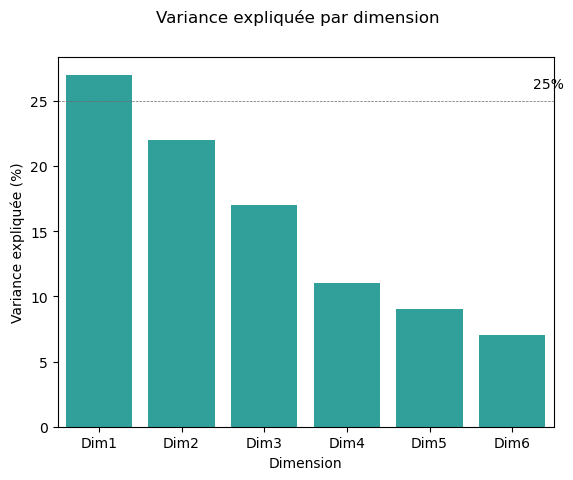

In [61]:
g_comp = sns.barplot(x="Dimension", 
                     y="% variance expliquée",
                     palette=["lightseagreen"],
                     data=comp)
g_comp.set(ylabel="Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y=25, linewidth=.5, color="dimgray", linestyle="--") # 25 = 100 / 4 (nb dimensions)
plt.text(len(comp) - 0.75, 26, "25%")  # Modifier la position du texte en fonction du nombre de dimensions
plt.show()

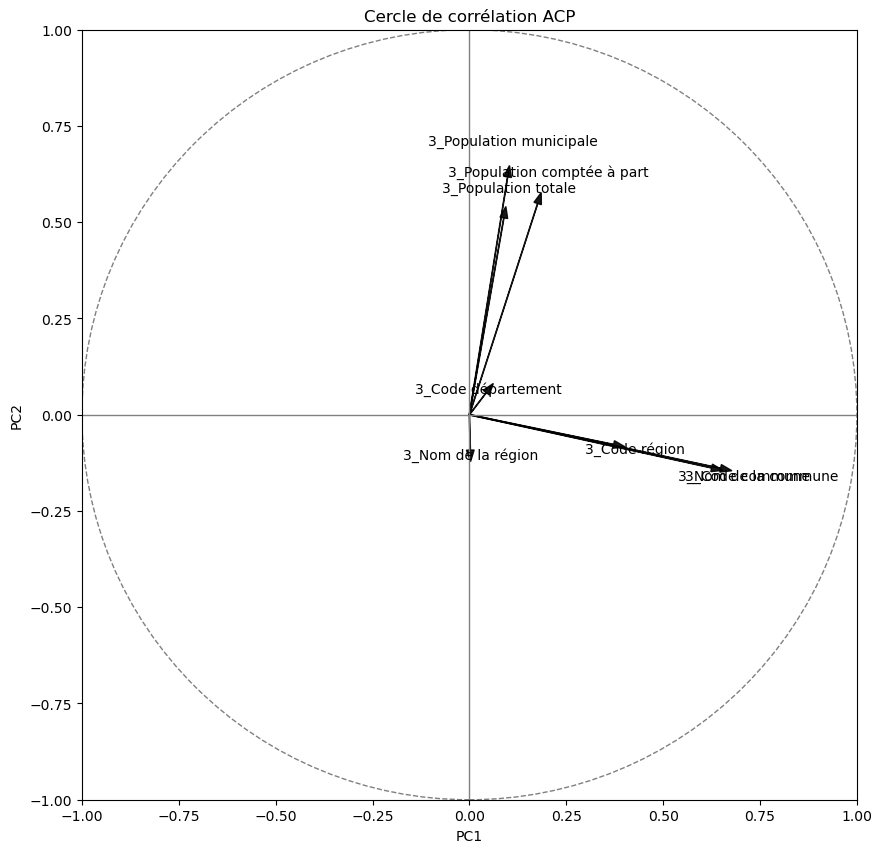

In [67]:
# Transposer les composantes principales pour obtenir les coefficients de corrélation
coeff = np.transpose(pca.components_[0:4, :])
n = coeff.shape[0]

# Créer la figure
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, df.columns[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP')

# Afficher la figure
plt.show()


In [77]:
# Séparation des données en variables explicatives (X) et variable cible (y)
X = df_acp.drop(columns=["3_Nom de la commune"])  # Sélectionnez les colonnes pertinentes comme variables explicatives
y = df_acp["3_Nom de la commune"]

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]

# Créer la figure
fig, ax = plt.subplots(figsize=(12, 12))

# Visualiser les catégories de la variable cible avec les couleurs
categories = df_acp["3_Nom de la commune"].unique()  # Obtenez les différentes catégories de la variable cible
colors = plt.cm.tab10(np.linspace(0, 1, len(categories)))  # Choisissez une palette de couleurs en fonction du nombre de catégories

for color, category in zip(colors, categories):
    plt.scatter(X_pca[y == category, 0], X_pca[y == category, 1], color=color, alpha=.8, label=category)

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02, linestyle='--')
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, X.columns[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ACP avec cercle de corrélation et nuage des individus par catégorie')

# Afficher la légende
plt.legend(loc='best', shadow=False, scatterpoints=1)

# Afficher la figure
plt.show()


ValueError: Image size of 1004x709716 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x1200 with 1 Axes>